![header](img/Header.jpg)

# COPERNICUS MARINE PHYSICAL IBI TRAINING

<div style="text-align: right"><i> 05-01-PHY </i></div>

***

<center><h1>Visualization of North West African Upwelling using IBI-PHY products</h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. Visualization of upwelling in monthly basis with IBI-PHY-REA products](#2.-Visualization-of-upwelling-in-monthly-basis-with-IBI-PHY-REA-products)
    - [2.1. Dataset](#2.1.-Dataset)
    - [2.2. Input](#2.2.-Input)
    - [2.3. Maps](#2.3.-Maps)
- [3. Visualization of upwelling in daily basis with IBI-PHY-NRT products](#3.-Visualization-of-upwelling-in-daily-basis-with-IBI-PHY-NRT-products)
    - [3.1. Dataset](#3.1.-Dataset)
    - [3.1. Input](#3.2.-Input)
    - [3.2. Maps](#3.3.-Maps)
- [4. Time series of Sea Surface Temperature](#4.-Time-Series-of-Sea-Surface-Temperature)
    - [4.1. Input](#4.1.-Input)
    - [4.2. Time series plot](#4.2.-Time-series-plot)
- [5. Vertical section of temperature](#5.-Vertical-section-of-temperature)
    - [5.1. Input](#5.1.-Input)
    - [5.2. Vertical sections](#5.2.-Vertical-sections)
***

# 1. Introduction
[Go back to the "Table of contents"](#Table-of-contents)

Coastal upwelling process occurs along coastlines as the result of deflection of the oceanic water away from the shore. Such deflection is produced by Ekman transport induced by persistent winds parallel to the coast line. When this transported water is forced, the mass balance is maintained by pumping of ascending intermediate water. This water is typically denser, cooler and richer in nutrients. The Iberia-Biscay-Ireland domain contains two well-documented Eastern Boundary Upwelling Ecosystems, they are hosted under the same system known as Canary Current Upwelling System. This system is one of the major coastal upwelling regions of the world and it is produced by the eastern closure of the Subtropical Gyre. The Northwest coast of Africa presents an intense upwelling region that extends from Morocco to south of Senegal, likewise the western coast of the Iberian Peninsula shows a seasonal upwelling behavior. These two upwelling domains are separated by the presence of the Gulf of Cadiz, where the coast line does not allow the formation of upwelling conditions from 34ºN up to 37ºN.

The IBI-MFC catalog provides a variety of products that can be used to analyze, describe and monitor the upwelling processes in the west African coast and Iberian Peninsula. In order to fulfill the specific requirements of each user, these data are produced throughout different systems covering a wide range of time coverages, temporal frequencies, spatial resolutions and variables. The near real-time (NRT) operational products are updated daily providing high resolution analysis products for the last years and forecast products for the coming days. On the other hand, the reanalysis products (REA) provide three dimensional estimates of the ocean computed from the best available data; the reanalysis products are delivered in quarterly basis covering a long time record. In the present example, we will use data from both, NRT and REA systems to visualize the upwelling processes in the Northwest African Coast. We will observe that, while the NRT systems can provide an analysis with high spatial and temporal resolution; the REA systems are able to provide information with lower spatial and temporal resolution but with longer time coverages.

Documentation of the required data to run this example can be downloaded from the CMEMS Catalog.
* **IBI-PHY-REA:** [IBI_REANALYSIS_PHYS_005_002](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=IBI_REANALYSIS_PHYS_005_002)
* **IBI-PHY-NRT:** [IBI_ANALYSIS_FORECAST_PHYS_005_001](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=IBI_ANALYSIS_FORECAST_PHYS_005_001)

The surface cooling, from upwelled water reaching the sea surface, is a potential proxy of the upwelling intensity. Therefore, the comparison between the coastal and open-ocean SST is widely applied as indicator of the upwelling activity. Additionally, the high primary productivity associated with coastal upwelling systems implies the modification of a number of other biochemical properties such as dissolved nutrients, chlorophyll concentration and others.

In the present example we will analyze the upwelling using the physical parameter Sea Surface Temperature (SST). To do that, we will use the variable temperature (**thetao**) produced by the systems IBI-PHY-REA and IBI-PHY-NRT.




### Setup
First of all, the python interpreter must import all the necessary tools and libraries from the Jupyter Notebook Ecosystem. Below, you find the description of the most useful libraries:

| Module name | Description |
| :---: | :---|
| **os** | [ Miscellaneous operating system interfaces](https://docs.python.org/3.7/library/os.html) for managing paths, creating directories,... |
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |
| **basemap** |[The matplotlib basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps in Python. |

In [1]:
#### Import libraries ####

import numpy
import xarray
from pandas import to_datetime

import datetime

import matplotlib.pyplot
import matplotlib.dates

from mpl_toolkits.basemap import Basemap

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/home/joao/miniconda3/envs/cms/lib/python3.7/site-packages/matplotlib/cbook/__init__.py)

# 2. Visualization of upwelling in monthly basis with IBI-PHY-REA products
[Go back to the "Table of contents"](#Table-of-contents)

__Objective:__ Plot monthly maps of SST.

 ## 2.1. Dataset
For this section we use a dataset obtained from the IBI-PHY-REA system, data can be downloaded through Copernicus Marine [SUBSETTER interface](http://marine.copernicus.eu/faq/how-to-download-cmems-products/?idpage=169):

* **IBI-PHY-REA Product**: IBI_REANALYSIS_PHYS_005_002
* **Dataset**: DATASET-IBI-REANALYSIS-PHYS-005-002-MONTHLY
* **Spatial region**: An area covering from the North Atlantic African coast to a thousand of kilometers inshore. Lat=(26ºN, 38ºN), Lon=(-19ºE,-4ºE)
* **Depth**: From surface to ~550m.  
* **Variables**: thetao (temperature)
* **Time period**: from 1992-01 to 2018-12 

(__Optional:__ Go to the `Product Description Main Page` and try to download this data selection by using the Graphical User Interface. Note: You'll need to have your own Copernicus marine credentials -- username and password. Creating an account is free of charge and available [here](http://marine.copernicus.eu/services-portfolio/register-now/)).

## 2.2. Input
Once the dataset is downloaded, we can start to work. In the following lines we define several parameters that will be required in this example.
* **FName:** Name and path where the datafile is stored
* **VarName:** Name of the variable to be used in the datafile.
* **PlotWindow(LatMin, LatMax, LonMin, LonMax):** Define the lat/lon boundaries of the maps.
* **Initial and Final Dates (DateIni, DateEnd):** Define a range of dates to be plotted.
* **PathOut:** Path where the resulting figures will be stored.


In [1]:
#### Config Options ####

FName = 'data/IBI-PHY-REA_temperature_reanaysis_005_002_monthly.nc'    
VarName = 'thetao' #Temperature

# Define plot window
LatMin = 27
LatMax = 36
LonMin = -18
LonMax = -7

# Define initial and final dates (year, month, day)
DateIni = datetime.datetime(2015, 7, 1) 
DateEnd = datetime.datetime(2016, 12, 1)

# Path to store the resulting figures
PathOut = 'results/IBI-PHY-REA_monthly'


NameError: name 'datetime' is not defined


The following lines open the data file and show a summary of the data stored in the file. 

In [2]:
#### Open netCDF file and get data ####

# Open data sample
DS = xarray.open_dataset(FName)

# Show info of the data file
print(DS)

NameError: name 'xarray' is not defined

The following code defines the variable `Var` that stores the data of the specific variable (`VarName`) cropped according to the dimension limits defined previously: latitude (`LatMin`, `LatMax`), longitude (`LonMin`, `LonMax`), and time (`DateIni`, `DateEnd`). Dimension depth is specified (`depth = 0`) to select the surface level.

Additionally, a short summary of the selected data is printed. 

In [3]:
#### Select data to plot ####

# Shorcut to selected data
Var = DS[VarName].sel(depth = 0, method = 'nearest')
Var = Var.sel(latitude  = slice(LatMin, LatMax),
              longitude = slice(LonMin, LonMax),
              time      = slice(DateIni, DateEnd))

# Show info of the selected data
print(Var)

NameError: name 'DS' is not defined

## 2.3. Maps
The map of every selected time step is plotted as follows:

2015-07


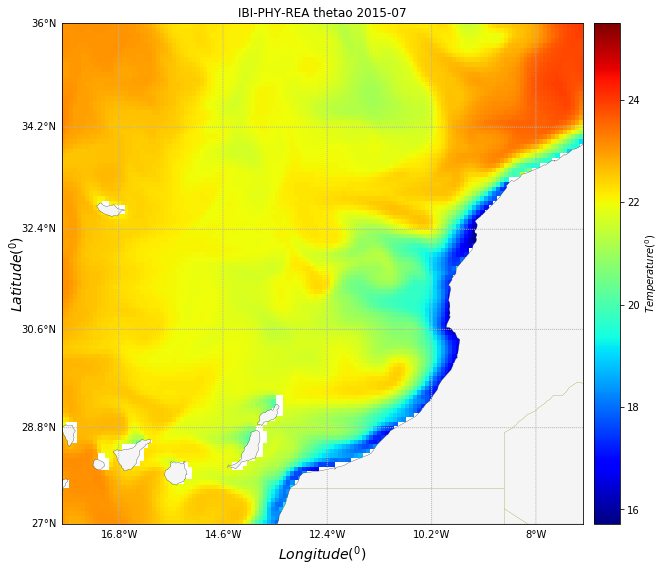

2015-08


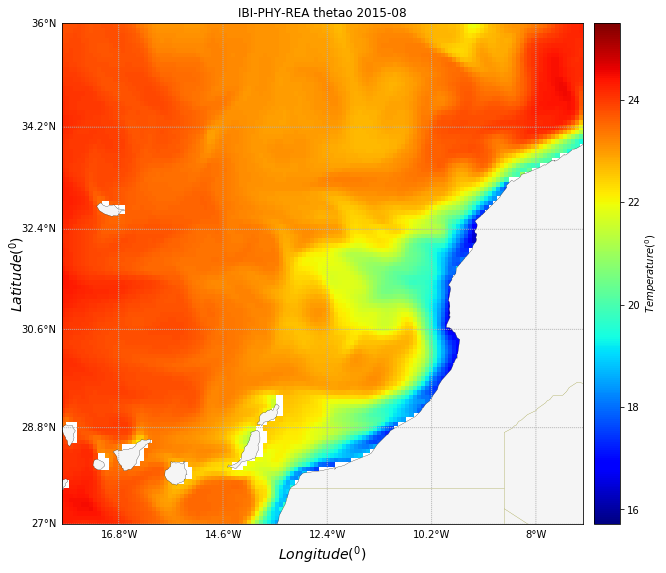

2015-09


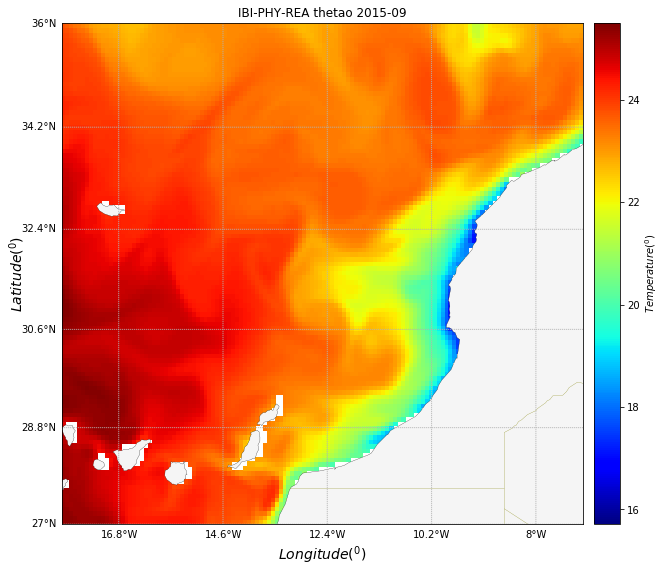

2015-10


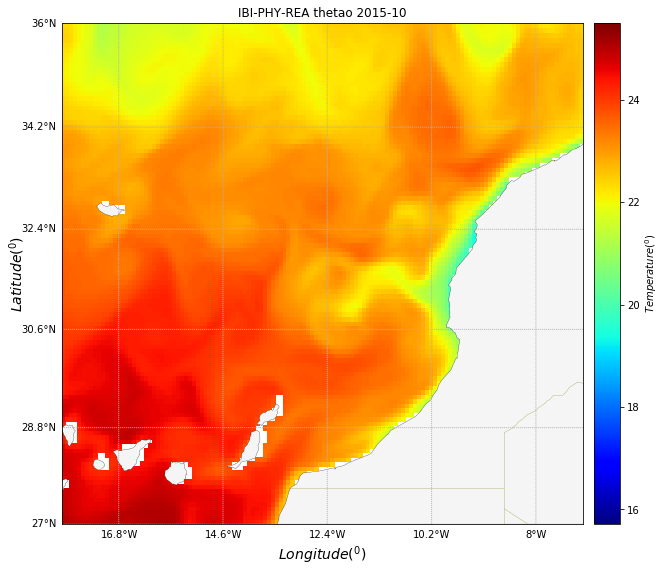

2015-11


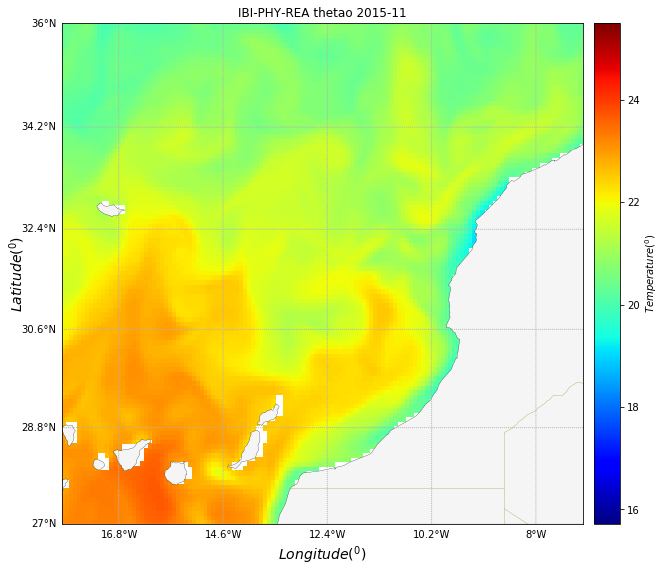

2015-12


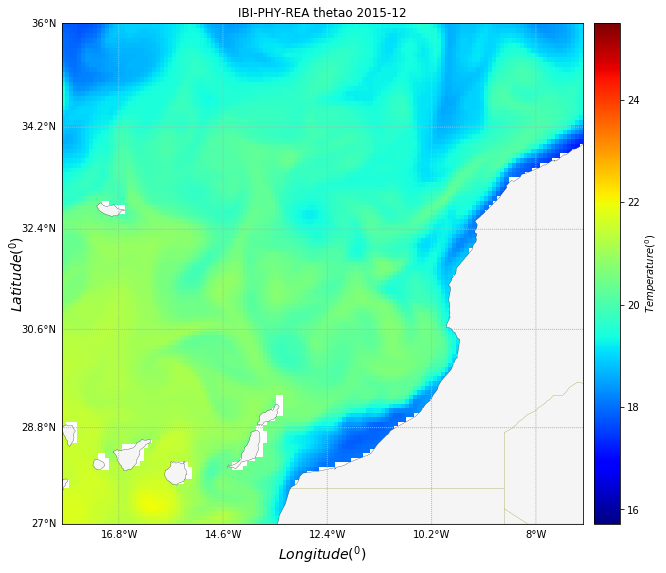

2016-01


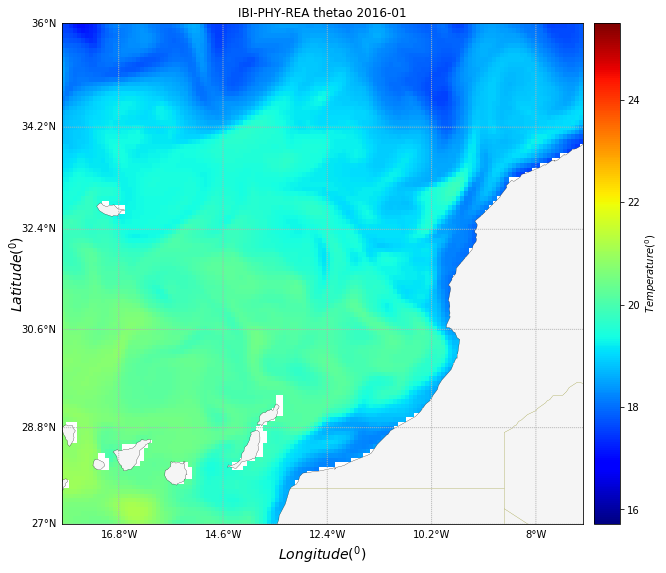

2016-02


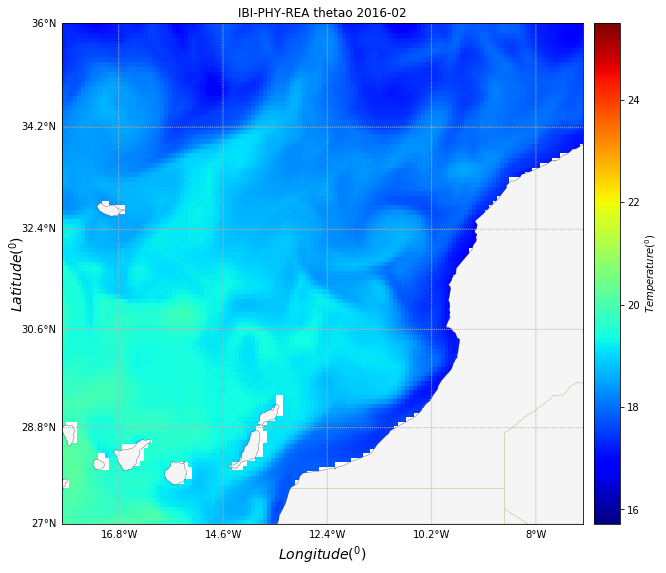

2016-03


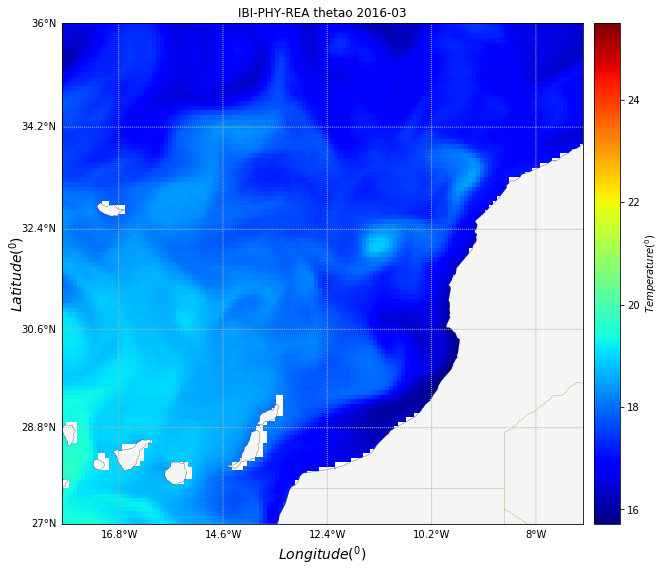

2016-04


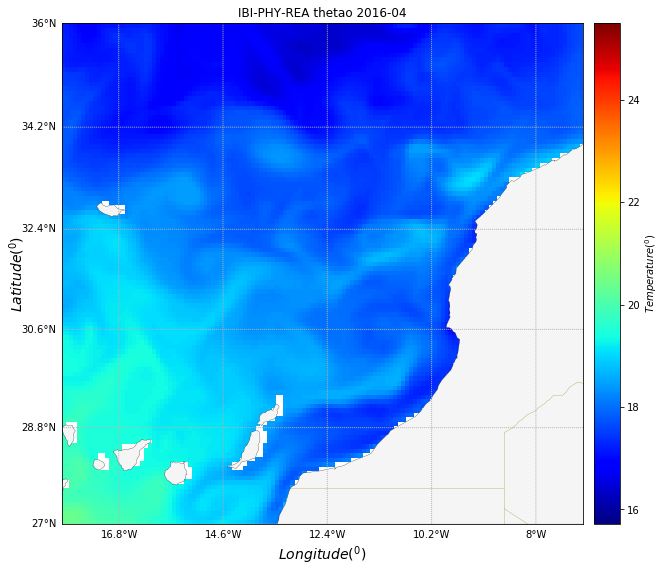

2016-05


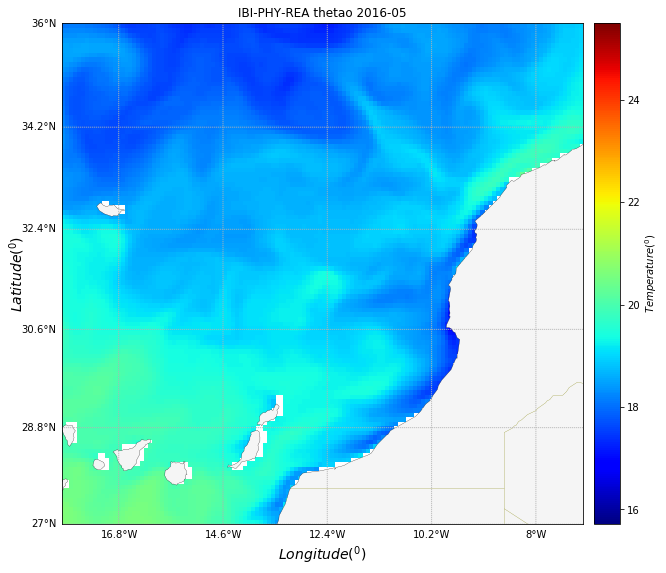

2016-06


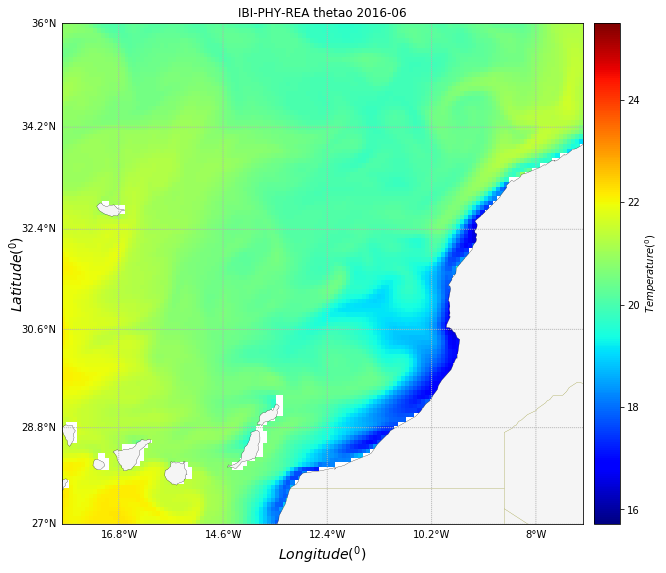

2016-07


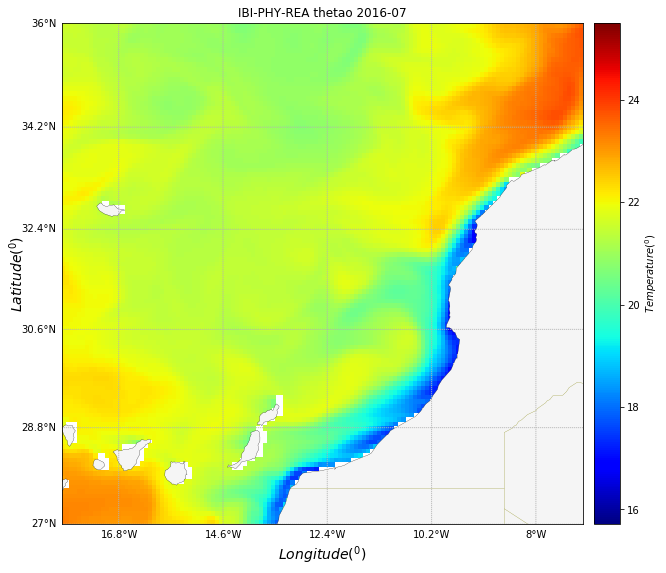

2016-08


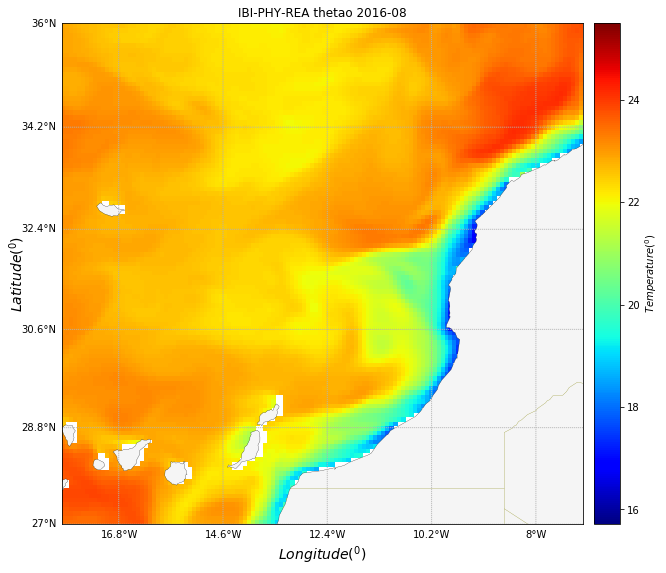

2016-09


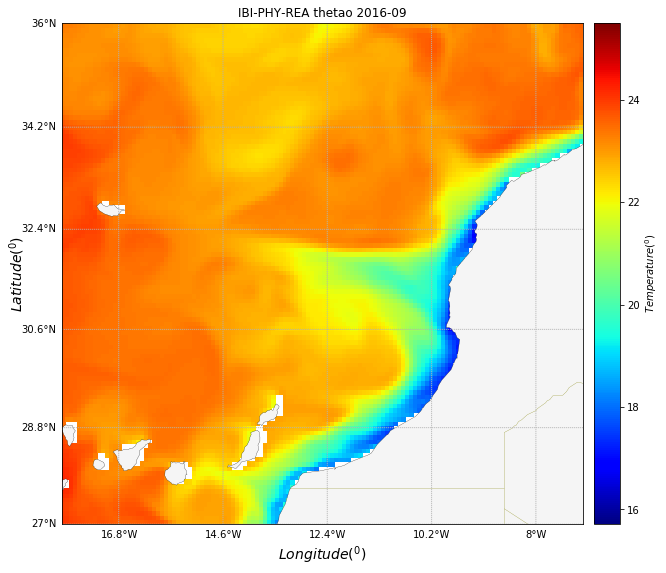

2016-10


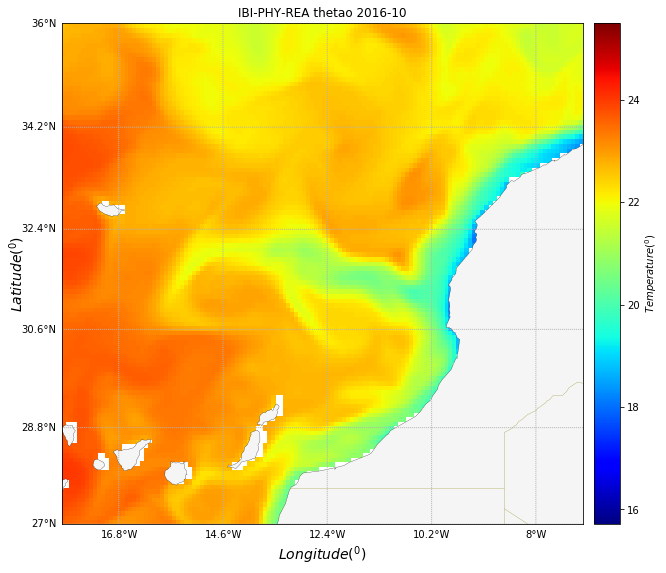

2016-11


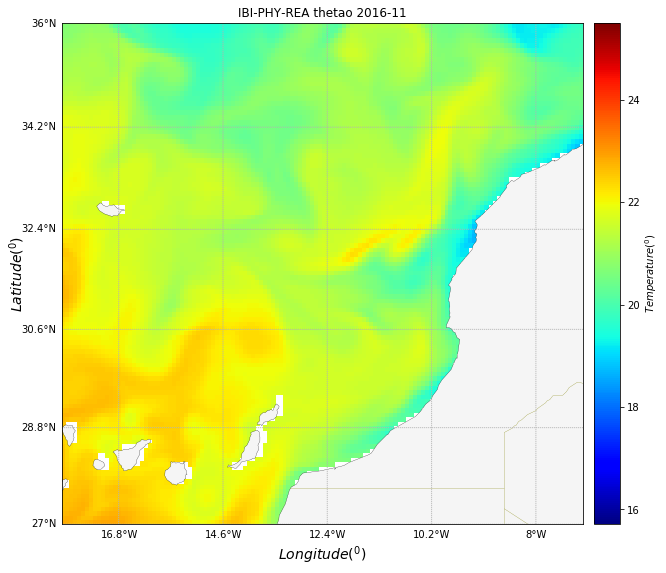


*** DONE ***


In [6]:
#### Plot every time step ####

# Define max and min values for color scales.
MinVal = numpy.nanmin(Var)
MaxVal = numpy.nanmax(Var)

# Loop for each time step
for TimeStep in Var.time.values:
    StrDate = to_datetime(str(TimeStep)).strftime('%Y-%m')
    print(StrDate)
    
    # Selecting data to plot
    D2P = Var.sel(time = TimeStep)

    # Plot map
    Fig = matplotlib.pyplot.figure(StrDate, figsize=(10, 10))
    Ax = matplotlib.pyplot.subplot()

    Map = Basemap(projection='merc',
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i', area_thresh=200.0)

    # draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    DLat = (LatMax - LatMin) / 5
    DLat = float('{:4.1f}'.format(DLat))
    DLon = (LonMax - LonMin) / 5
    DLon = float('{:4.1f}'.format(DLon))
    parallels = numpy.arange(0.,90,DLat) #5.)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = numpy.arange(-30.,60.,DLon) #5.)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')

    # Axes labels
    matplotlib.pyplot.ylabel('$Latitude (^0)$', labelpad=35, fontsize=14)
    matplotlib.pyplot.xlabel('$Longitude (^0)$', labelpad=20, fontsize=14)

    # Lat/Lon grid
    LonG, LatG = numpy.meshgrid(Var.longitude.values, Var.latitude.values)

    # Projection from Lat/Lon to axis X/Y
    X, Y = Map(LonG, LatG)

    # Plot with linear color scale
    Z = D2P.values
    P = matplotlib.pyplot.pcolormesh(X, Y, Z, cmap='jet', vmin=MinVal ,vmax=MaxVal)
    
    # Add color scale
    Cb = Map.colorbar(P, "right")
    Cb.set_label('$Temperature (^0)$')

    # Title
    Title = 'IBI-PHY-REA {} {}'.format(VarName, StrDate)
    matplotlib.pyplot.title(Title)

    # Show figure
    matplotlib.pyplot.show()
    
    # Save figure
    FigOut = '{}/IBI-PHY-REA_monthly_{}.jpg'.format(PathOut, StrDate)
    Fig.savefig(FigOut)
    
print('\n*** DONE ***')

<blockquote>

### Discussion of results:

See the behaviour of the upwelling:
* How can we detect the upwelling?
* Is it stronger in summer or winter?
* Can you see any filament?

### Exercise:
* Modify the previous code to show maps focused in a specific region.
* Modify the previous cells to plot just one map of a specific date.

</blockquote>

# 3. Visualization of upwelling in daily basis with IBI-PHY-NRT products
[Go back to the "Table of contents"](#Table-of-contents)

__Objective:__ Plot daily maps of SST.

## 3.1. Dataset 
For this section we use a dataset obtained from the IBI-PHY-NRT system, data can be downloaded through Copernicus Marine [SUBSETTER interface](http://marine.copernicus.eu/faq/how-to-download-cmems-products/?idpage=169):

* **IBI-PHY-NRT Product**: IBI_ANALYSIS_FORECAST_PHYS_005_001
* **Dataset**: DATASET-IBI-ANALYSIS-FORECAST-PHYS-005-001-DAILY
* **Spatial region**: An area covering from the North Atlantic African coast to a thousand of kilometers inshore. Lat=(26ºN, 38ºN), Lon=(-19ºE,-4ºE)
* **Depth**: From surface to ~550m.  
* **Variables**: thetao (temperature)
* **Time period**: From 2020-06-01 to 2020-07-31 

(__Optional:__ Go to the `Product Description Main Page` and try to download this data selection by using the Graphical User Interface. Note: You'll need to have your own Copernicus marine credentials -- username and password. Creating an account is free of charge and available [here](http://marine.copernicus.eu/services-portfolio/register-now/)).

## 3.2. Input
As in the previous example, once the dataset is downloaded, we define several parameters that will be required in this example.
* **FName:** Name and path where the datafile is stored
* **VarName:** Name of the variable to be used in the datafile.
* **PlotWindow(LatMin, LatMax, LonMin, LonMax):** Define the lat/lon boundaries of the maps.
* **Initial and Final Dates (DateIni, DateEnd):** Define a range of dates to be plotted.
* **PathOut:** Path where the resulting figures will be stored.


In [7]:
#### Config Options ####

FName = 'data/IBI-PHY-NRT_temperature_analysis_005_001_daily.nc'
VarName = 'thetao'

# Define plot window
LatMin = 27
LatMax = 36
LonMin = -18
LonMax = -7

# Define initial and final dates (year, month, day)
DateIni = datetime.datetime(2020, 7, 1) 
DateEnd = datetime.datetime(2020, 7, 31)

# Path to store the resulting figures
PathOut = 'results/IBI-PHY-NRT_daily'

The following lines open the data file and show a summary of the data stored in the file. 

In [8]:
#### Open netCDF file and get data ####

# Open data sample
DS = xarray.open_dataset(FName)

# Show info of the data file
print(DS)

<xarray.Dataset>
Dimensions:    (depth: 32, latitude: 433, longitude: 541, time: 61)
Coordinates:
  * depth      (depth) float32 0.494025 1.541375 2.645669 ... 453.9377 541.0889
  * latitude   (latitude) float32 26.0 26.027779 26.055555 ... 37.97222 38.0
  * time       (time) datetime64[ns] 2020-06-01T12:00:00 ... 2020-07-31T12:00:00
  * longitude  (longitude) float32 -19.0 -18.972221 ... -4.0277777 -4.0
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.0
    source:                                 IBI-MFC (PdE Production Center)
    institution:                            Puertos del Estado (PdE)
    title:                                  Ocean 3D daily mean fields for th...
    easting:                                longitude
    northing:                               latitude
    references:                      

<blockquote>

### Discussion of results
Compare the summary with the one obtained with IBI-PHY-REA data. Do you see any difference?

</blockquote>

The following code defines the variable `Var` that stores the data of the specific variable (`VarName`) cropped according to the dimension limits defined previously: latitude (`LatMin`, `LatMax`), longitude (`LonMin`, `LonMax`), and time (`DateIni`, `DateEnd`). Dimension depth is specified (`depth = 0`) to select the surface level.

Additionally, a short summary of the selected data is printed. 

In [9]:
#### Select data to plot ####

# Shorcut to selected data
Var = DS[VarName].sel(depth = 0, method = 'nearest')
Var = Var.sel(latitude  = slice(LatMin, LatMax),
              longitude = slice(LonMin, LonMax),
              time      = slice(DateIni, DateEnd))

# Show info of the selected data
print(Var)

<xarray.DataArray 'thetao' (time: 30, latitude: 325, longitude: 397)>
[3870750 values with dtype=float32]
Coordinates:
    depth      float32 0.494025
  * latitude   (latitude) float32 27.0 27.027779 27.055555 ... 35.97222 36.0
  * time       (time) datetime64[ns] 2020-07-01T12:00:00 ... 2020-07-30T12:00:00
  * longitude  (longitude) float32 -18.0 -17.972221 ... -7.0277777 -7.0
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Temperature
    units:          degrees_C
    unit_long:      degrees_C


## 3.3. Maps
The map of every selected time step is plotted with the following code:

2020-07-01


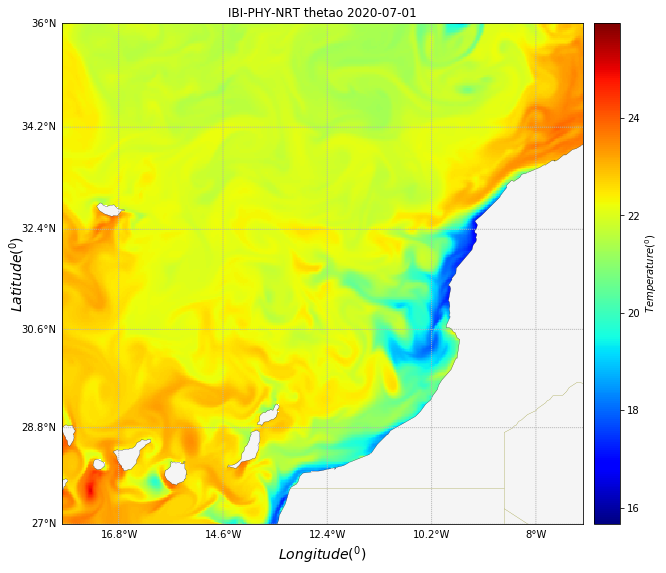

2020-07-02


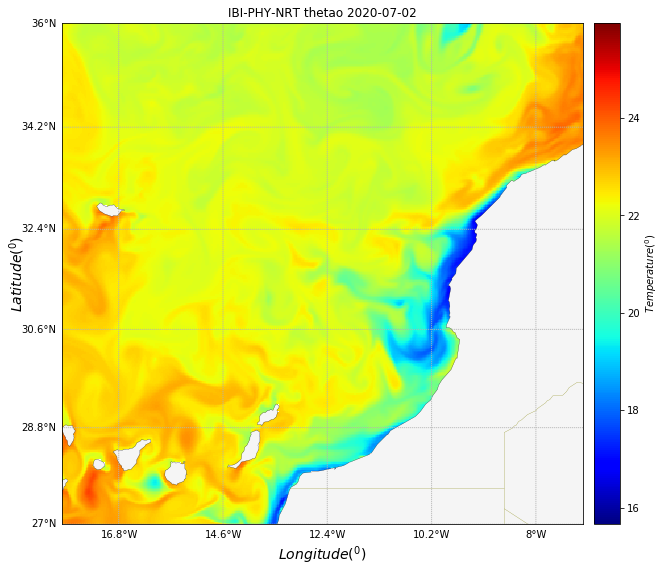

2020-07-03


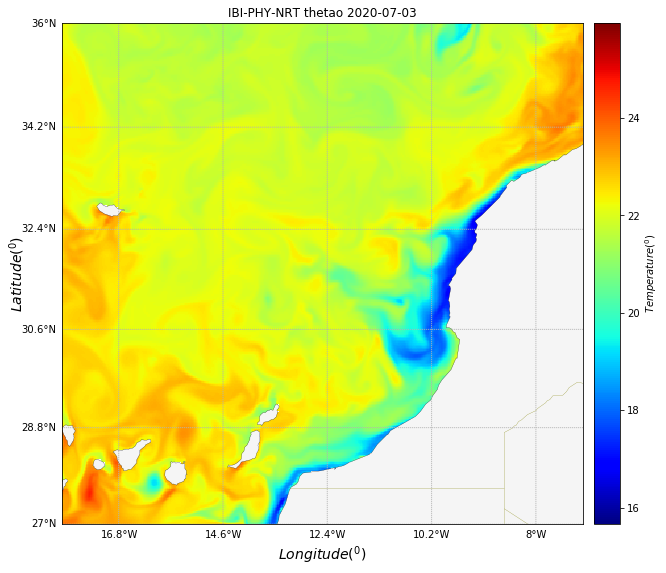

2020-07-04


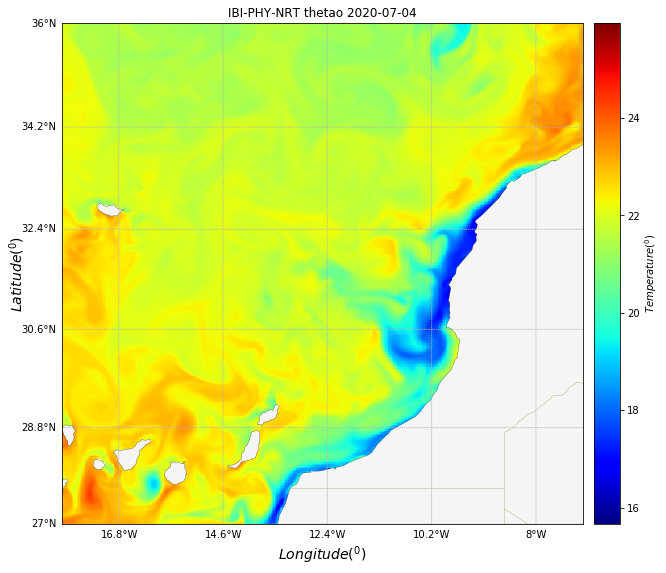

2020-07-05


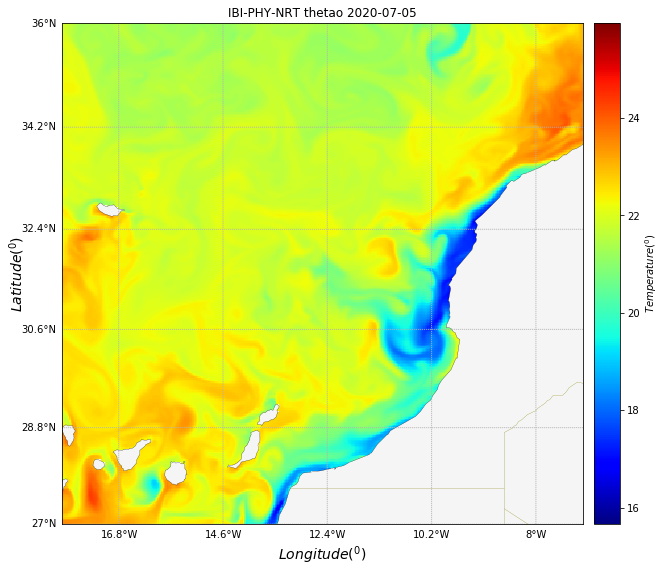

2020-07-06


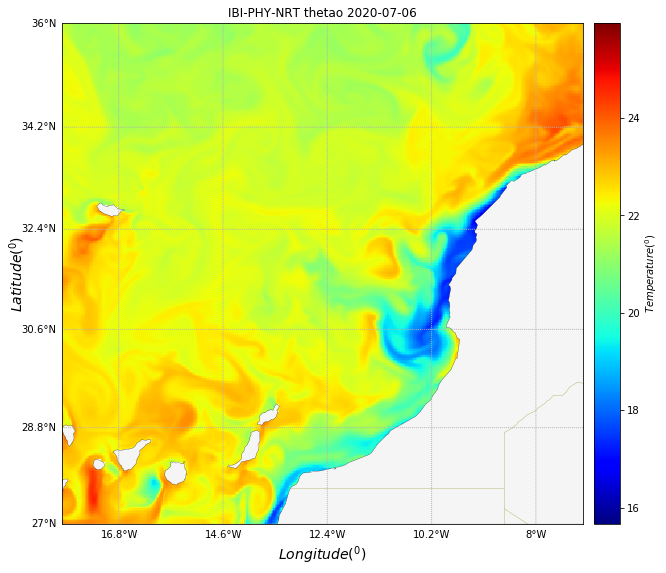

2020-07-07


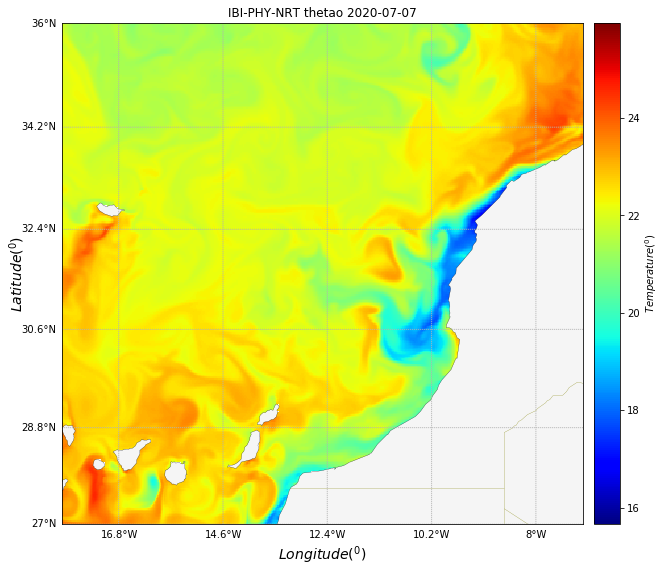

2020-07-08


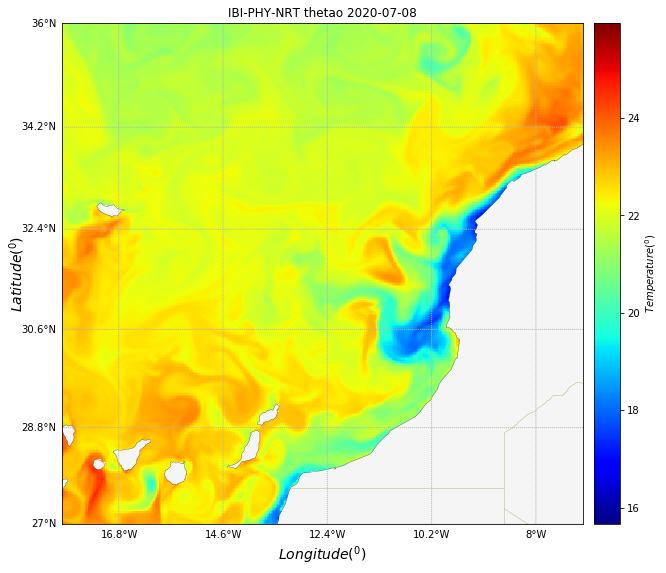

2020-07-09


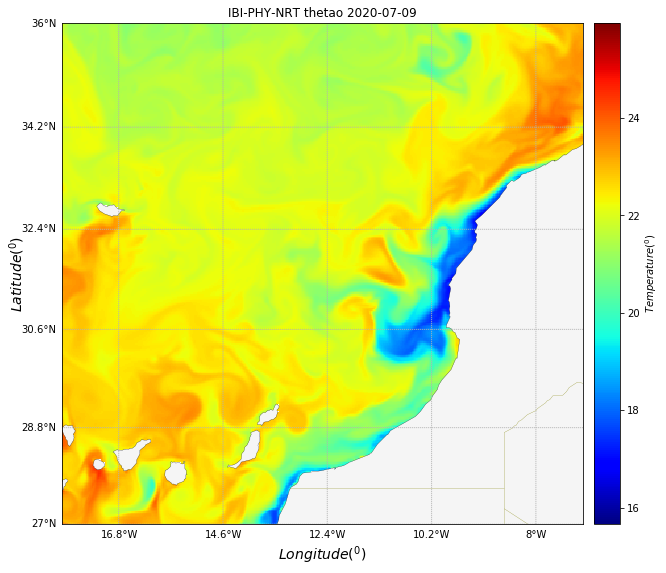

2020-07-10


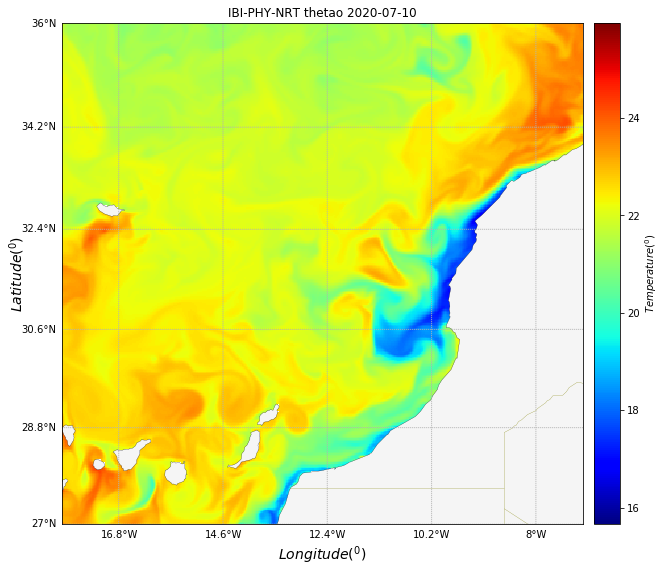

2020-07-11


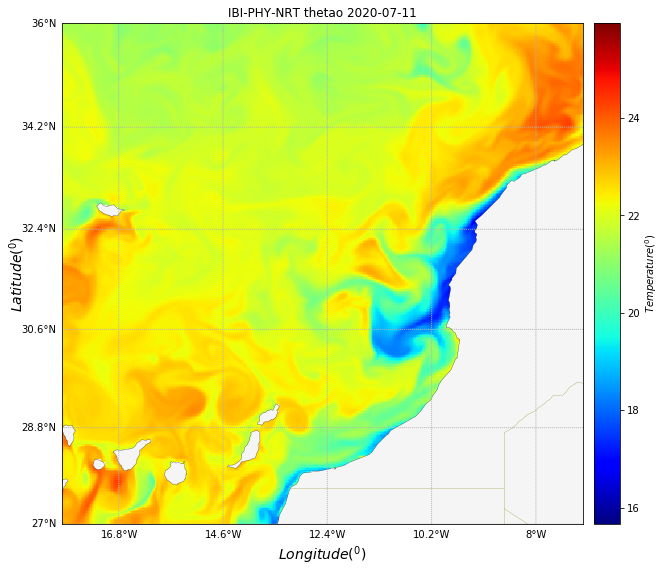

2020-07-12


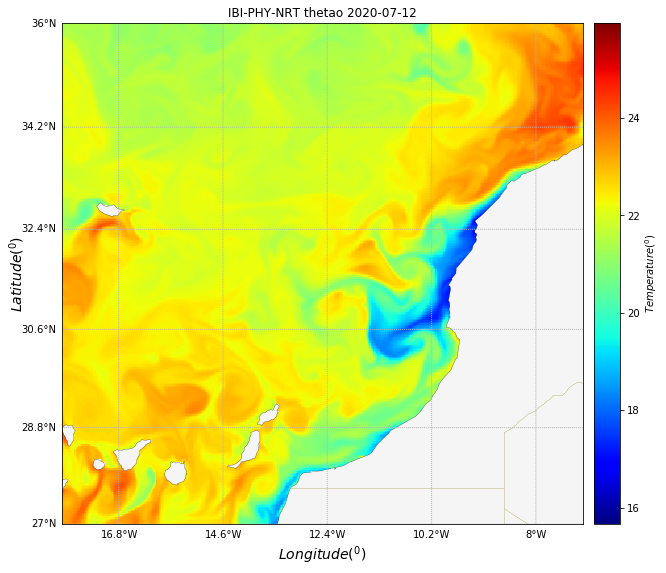

2020-07-13


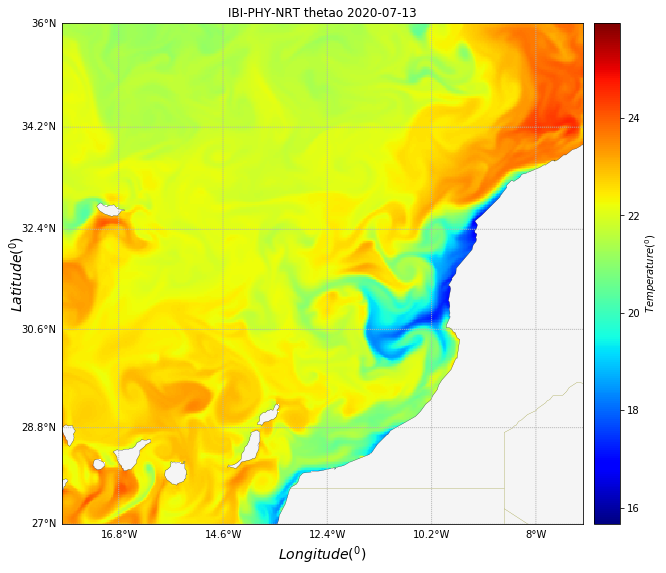

2020-07-14


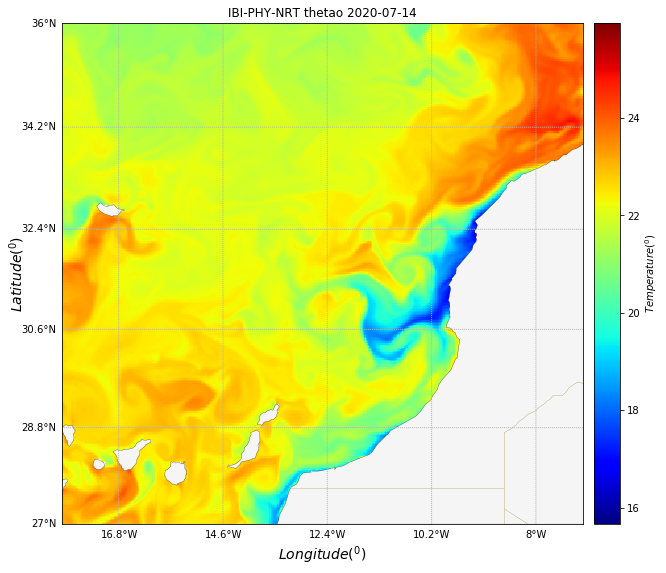

2020-07-15


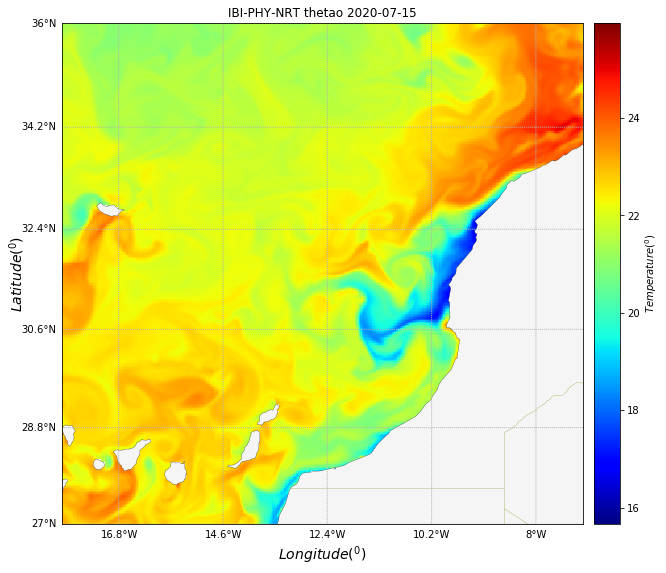

2020-07-16


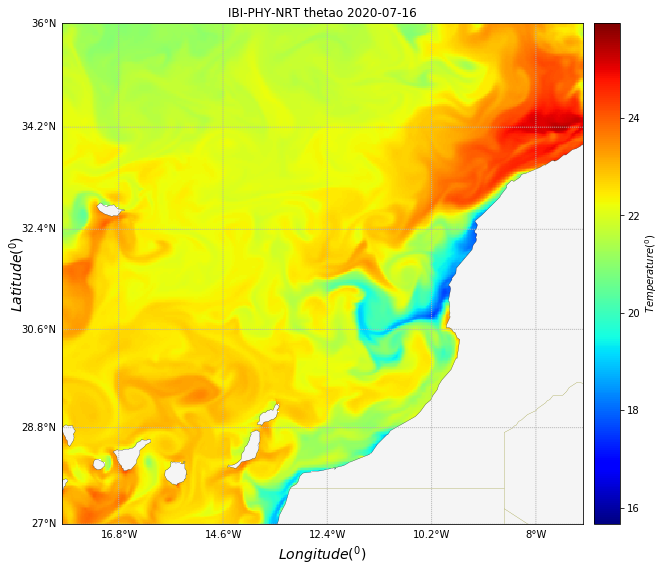

2020-07-17


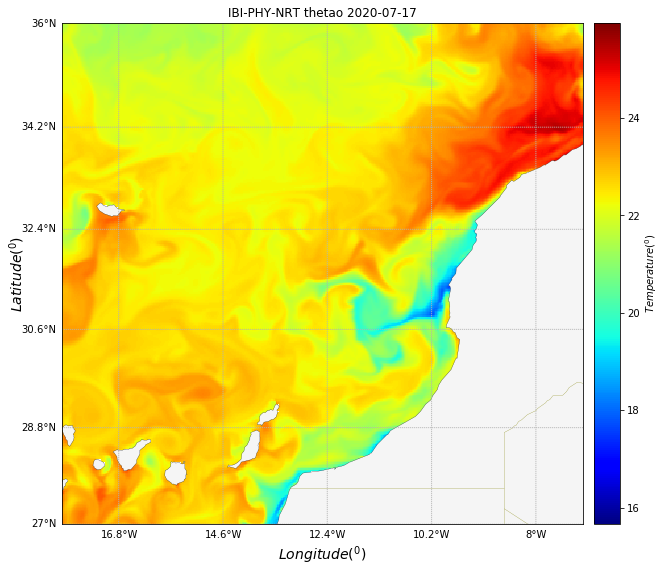

2020-07-18


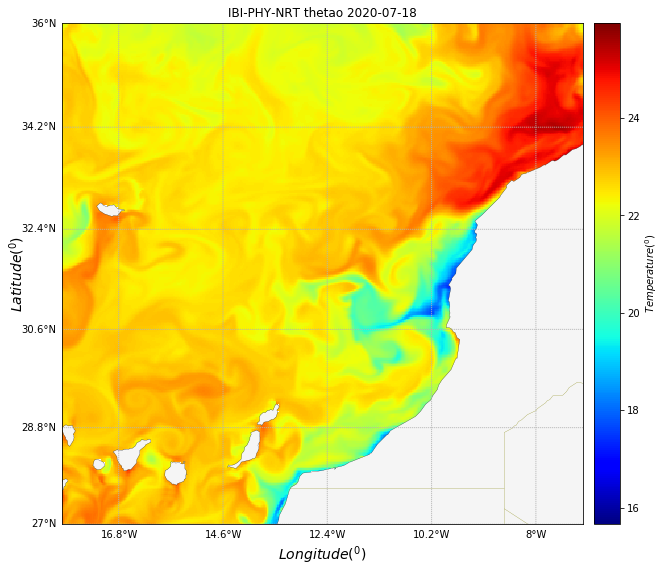

2020-07-19


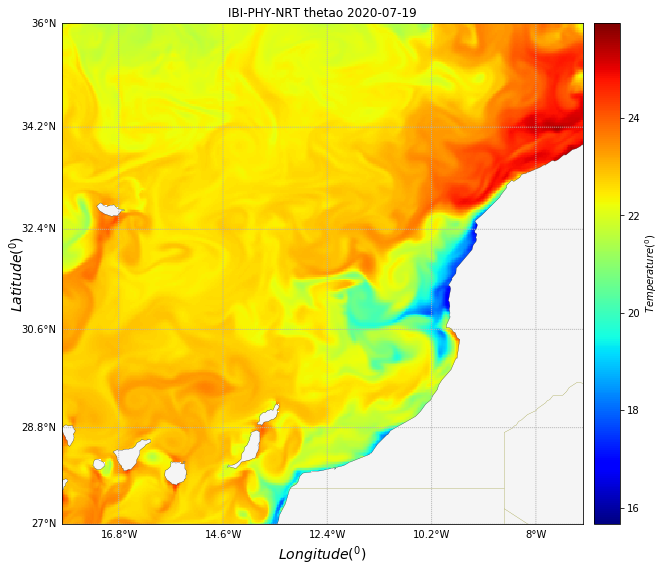

2020-07-20


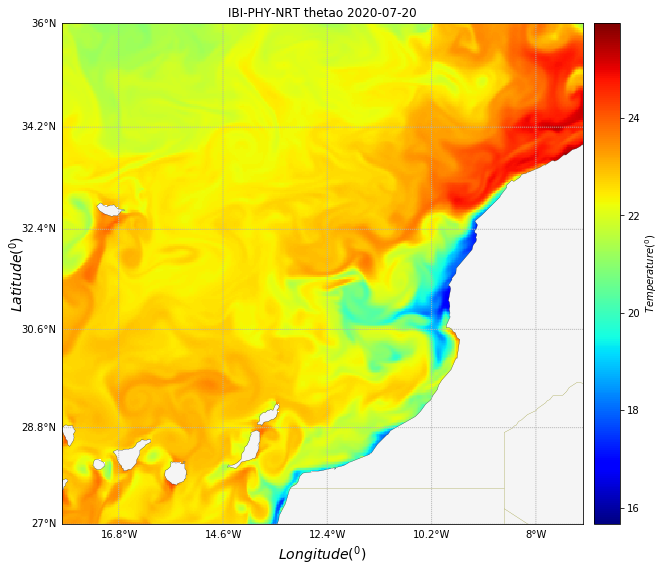

2020-07-21


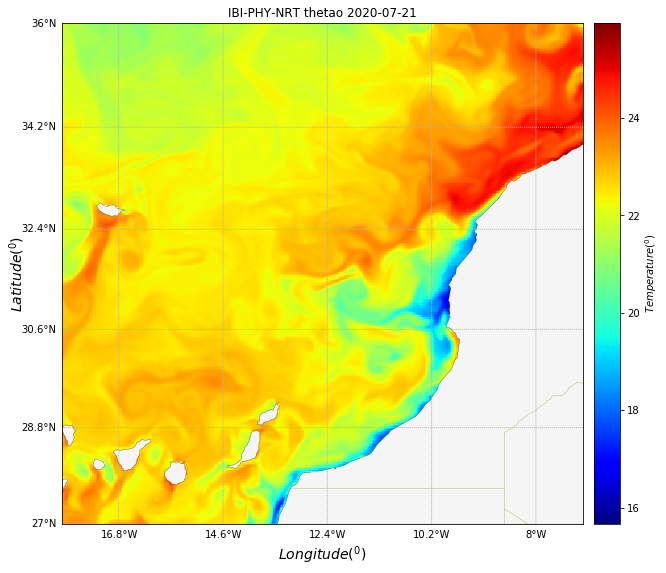

2020-07-22


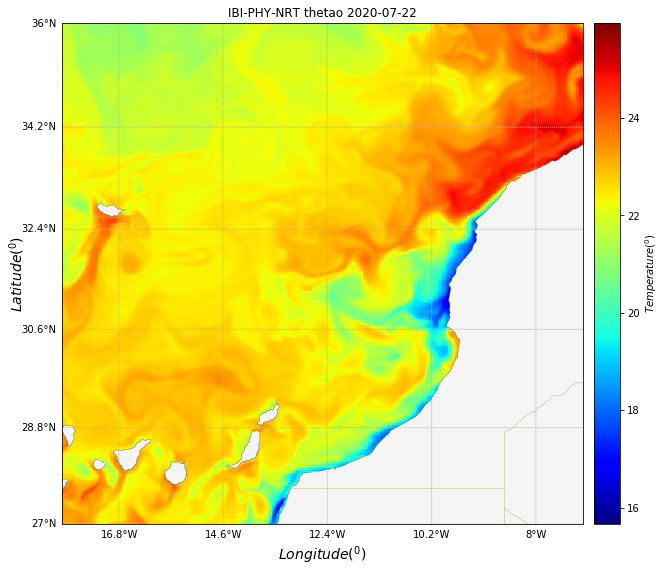

2020-07-23


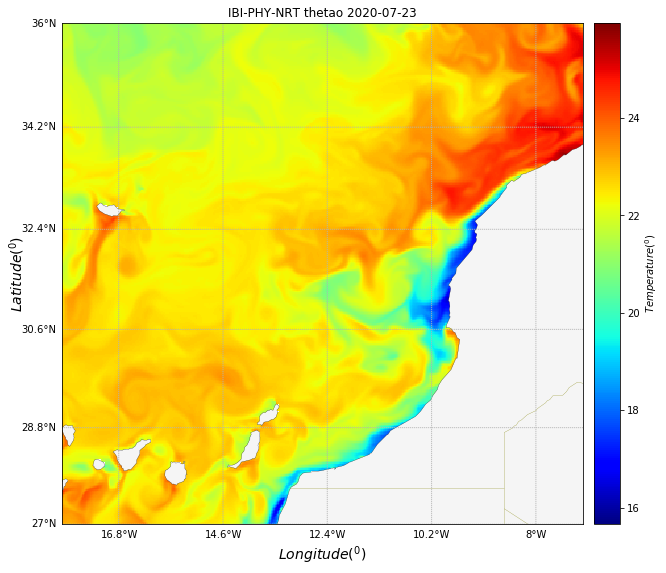

2020-07-24


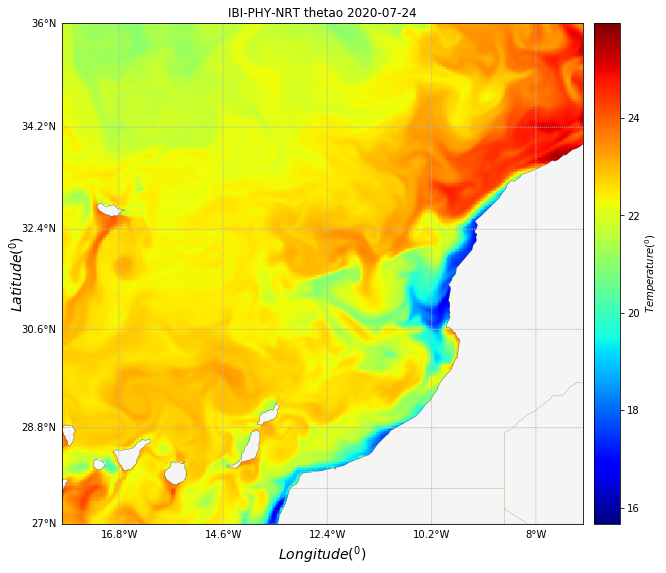

2020-07-25


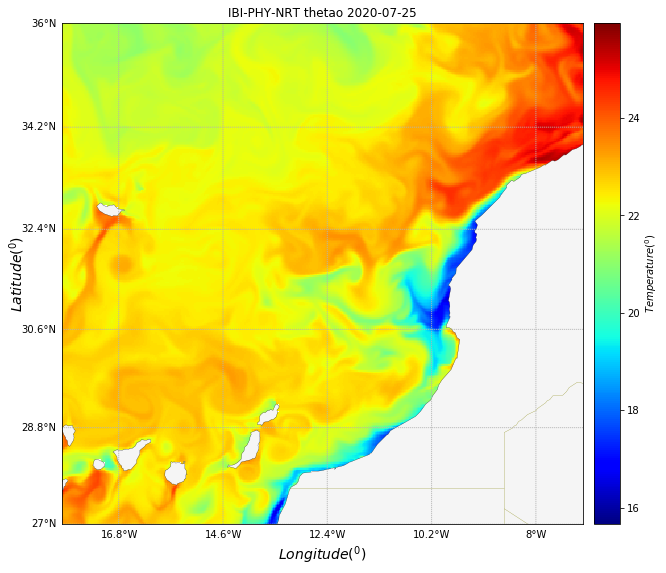

2020-07-26


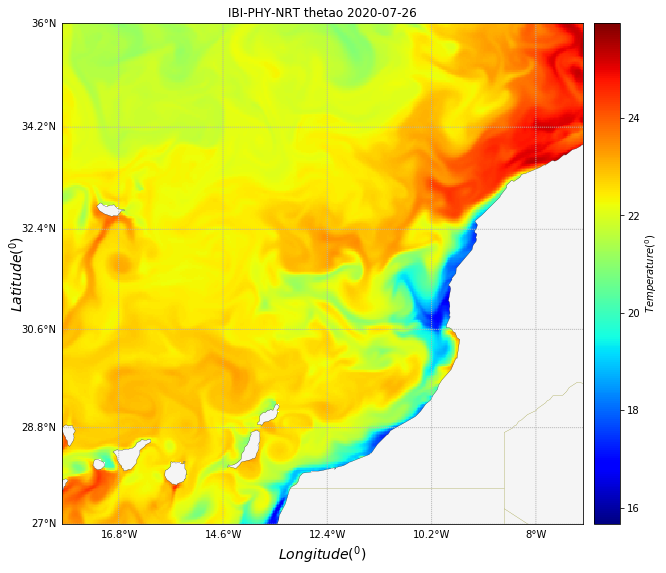

2020-07-27


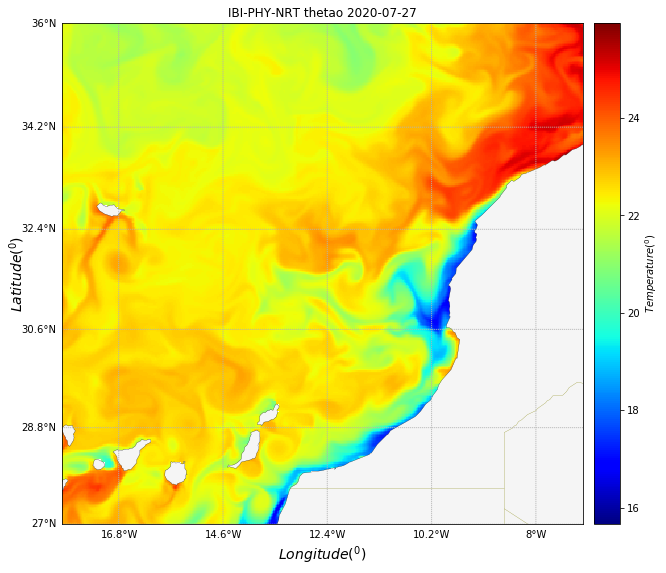

2020-07-28


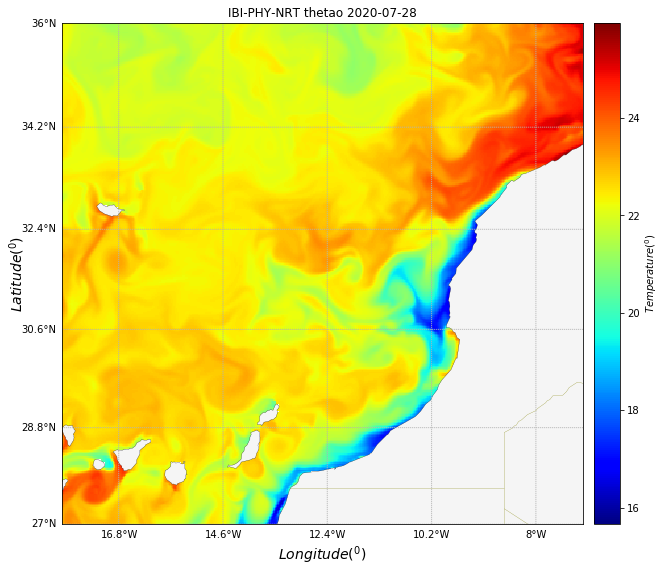

2020-07-29


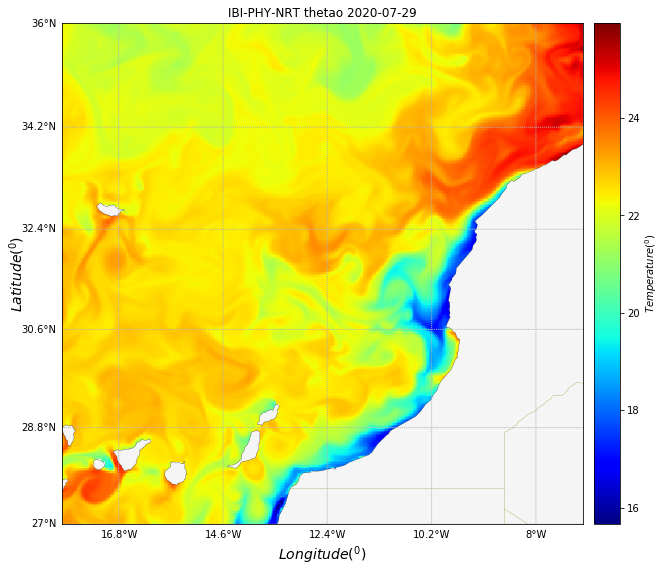

2020-07-30


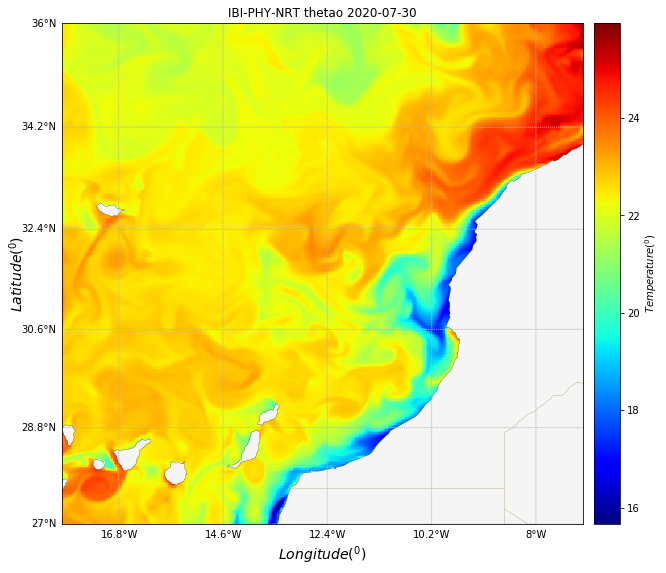


*** DONE ***


In [10]:
#### Plot every time step ####

# Define max and min values for color scales.
MinVal = numpy.nanmin(Var)
MaxVal = numpy.nanmax(Var)

# Loop for each time step
for TimeStep in Var.time.values:
    StrDate = to_datetime(str(TimeStep)).strftime('%Y-%m-%d')
    print(StrDate)
    
    # Selecting data to plot
    D2P = Var.sel(time = TimeStep)

    # Plot map
    Fig = matplotlib.pyplot.figure(StrDate, figsize=(10, 10))
    Ax = matplotlib.pyplot.subplot()

    Map = Basemap(projection='merc',
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i', area_thresh=200.0)

    # draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    DLat = (LatMax - LatMin) / 5
    DLat = float('{:4.1f}'.format(DLat))
    DLon = (LonMax - LonMin) / 5
    DLon = float('{:4.1f}'.format(DLon))
    parallels = numpy.arange(0.,90,DLat)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = numpy.arange(-30.,60.,DLon)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')

    # Axes labels
    matplotlib.pyplot.ylabel('$Latitude (^0)$', labelpad=35, fontsize=14)
    matplotlib.pyplot.xlabel('$Longitude (^0)$', labelpad=20, fontsize=14)

    # Lat/Lon grid
    LonG, LatG = numpy.meshgrid(Var.longitude.values, Var.latitude.values)

    # Projection from Lat/Lon to axis X/Y
    X, Y = Map(LonG, LatG)

    # Plot with linear color scale
    Z = D2P.values
    P = matplotlib.pyplot.pcolormesh(X, Y, Z, cmap='jet', vmin=MinVal ,vmax=MaxVal)
    
    # Add color scale
    Cb = Map.colorbar(P, "right")
    Cb.set_label('$Temperature (^0)$')

    # Title
    Title = 'IBI-PHY-NRT {} {}'.format(VarName, StrDate)
    matplotlib.pyplot.title(Title)

    # Show figure
    matplotlib.pyplot.show()
    
    # Save figure
    FigOut = '{}/IBI-PHY-NRT_daily_{}.jpg'.format(PathOut, StrDate)
    Fig.savefig(FigOut)
    
print('\n*** DONE ***')

<blockquote>

### Discussion of results

See the influence of spatial resolution comparing the maps obtained with the maps created in [section 2](#2.-Visualization-of-upwelling-in-monthly-basis-with-IBI-PHY-REA-products).
* Observe the differences of pixel size respect the previous example (IBI-PHY-REA produc).
* Observe the differences in the oceanographic features shown.
* Observe the time coverage and frequency.
* Do you think it is possible to plot the upwelling with the same time coverage and frequency than in [section 2](#2.-Visualization-of-upwelling-in-monthly-basis-with-IBI-PHY-REA-products)  (monthly means from 2015-07 to 2016-12) but using IBI-PHY-NRT data?
* Do you think it is possible to plot the upwelling with the same time coverage and frequency (daily means from 2020-07-01 to 2020-07-31) but using the system of the [section 2](#2.-Visualization-of-upwelling-in-monthly-basis-with-IBI-PHY-REA-products) example, IBI-PHY-REA data?


### Exercise:

* Modify the previous code to show maps focused in a specific region.
* Modify the previous cells to plot just one map of a specific date.

</blockquote>

# 4. Time Series of Sea Surface Temperature
[Go back to the "Table of contents"](#Table-of-contents)

__Objective:__ Plot temperature time series in a specific location.

## 4.1. Input
The following exercise will show the temperature time series in a specific lat/lon location. As example we use the monthly dataset from IBI-PHY-REA previously downloaded in [Step 1](#Section1).

As in the previous examples, we need to define some parameters that will be required.
* **FName:** Name and path where the datafile is stored
* **VarName:** Name of the variable to be used in the datafile.
* **SelLat:** Define the latitude for the time series.
* **SelLon:** Define the longitude for the time series.
* **PathOut:** Path where the resulting figures will be stored.

In [19]:
#### Config Options ####

FName = 'data/IBI-PHY-REA_temperature_reanaysis_005_002_monthly.nc'
VarName = 'thetao'

# Define plot location
SelLat = 31.0
SelLon = -11.0

# Path to store the resulting figures
PathOut = 'results'

The following lines open the data file, show a summary of the data stored in the file, and show a map with the selected location to be plotted. The red dot in the map indicates the location for the time series.

<xarray.Dataset>
Dimensions:    (depth: 32, latitude: 145, longitude: 181, time: 324)
Coordinates:
  * depth      (depth) float32 0.50576 1.5558553 2.6676817 ... 457.6256 565.2923
  * latitude   (latitude) float32 26.0 26.083334 26.166666 ... 37.916668 38.0
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2018-12-16T12:00:00
  * longitude  (longitude) float32 -19.0 -18.916666 ... -4.083334 -4.0000005
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.0
    source:                                 CMEMS IBI-MFC
    institution:                            Puertos del Estado (PdE) - Mercat...
    references:                             http://marine.copernicus.eu
    nco_openmp_thread_number:               1
    title:                                  CMEMS IBI REANALYSIS: MONTHLY PHY...
    easting:            

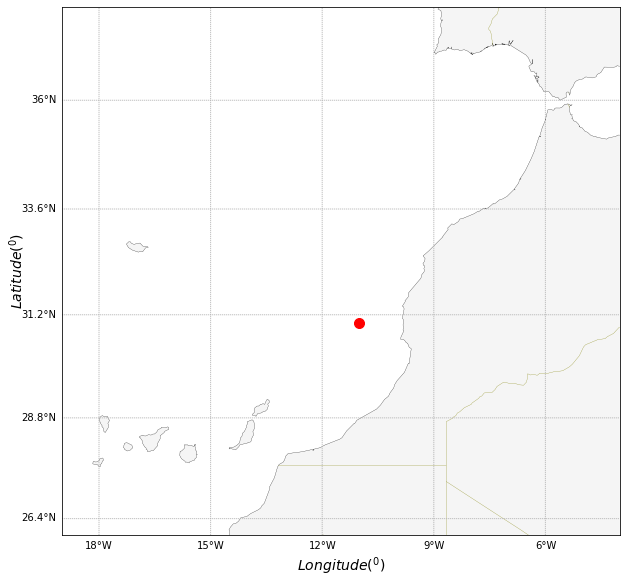

In [20]:
#### Open netCDF file ####

# Open data sample
DS = xarray.open_dataset(FName)

# Show info of the data file
print(DS)

#### Quick look of the selected location ####

# Get from the dataset the lat/lon boundaries for the map
LatMin = numpy.nanmin(DS.latitude)
LatMax = numpy.nanmax(DS.latitude)
LonMin = numpy.nanmin(DS.longitude)
LonMax = numpy.nanmax(DS.longitude)

# Map plot
Fig = matplotlib.pyplot.figure(figsize=(10, 10))
Ax = matplotlib.pyplot.subplot()

Map = Basemap(projection='merc',
              llcrnrlon=LonMin, llcrnrlat=LatMin,
              urcrnrlon=LonMax, urcrnrlat=LatMax,
              resolution='i', area_thresh=200.0)


# draw coastlines, country boundaries, fill continents.
Map.drawcoastlines(linewidth=0.25)
Map.drawcountries(linewidth=0.25, color='olive')
Map.fillcontinents(color='whitesmoke')

# Draw parallels & meridians
DLat = (LatMax - LatMin) / 5
DLat = float('{:4.1f}'.format(DLat))
DLon = (LonMax - LonMin) / 5
DLon = float('{:4.1f}'.format(DLon))
parallels = numpy.arange(0.,90,DLat) #5.)
Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
meridians = numpy.arange(-30.,60.,DLon) #5.)
Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')

# Axes labels
matplotlib.pyplot.ylabel('$Latitude (^0)$', labelpad=35, fontsize=14)
matplotlib.pyplot.xlabel('$Longitude (^0)$', labelpad=20, fontsize=14)

# Projection from Lat/Lon to axis X/Y
X, Y = Map(SelLon, SelLat)

# Plot location
matplotlib.pyplot.plot(X, Y, 'ro', markersize=10)

# Show figure
matplotlib.pyplot.show()


As in previous examples, the following code defines the variable `Var` that stores the data of the specific variable (`VarName`) in the closest grid point to the selected latitude (`SelLat`) and longitude (`SelLon`). Dimension depth is specified (`depth = 0`) to select the surface level.

Additionally, a short summary of the selected data is printed. 

In [21]:
#### Select data to plot ####

# Shorcut to selected data
Var = DS[VarName].sel(depth     = 0, 
                      latitude  = SelLat,
                      longitude = SelLon,
                      method    = 'nearest')

# Show info of the selected data
print(Var)

<xarray.DataArray 'thetao' (time: 324)>
array([18.093   , 17.695   , 17.694   , ..., 23.400002, 20.378   , 19.911   ],
      dtype=float32)
Coordinates:
    depth      float32 0.50576
    latitude   float32 31.0
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2018-12-16T12:00:00
    longitude  float32 -11.0
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Temperature
    units:          degrees_C
    unit_long:      degrees_C


## 4.2. Time series plot
Time series of data are plotted with the following code:

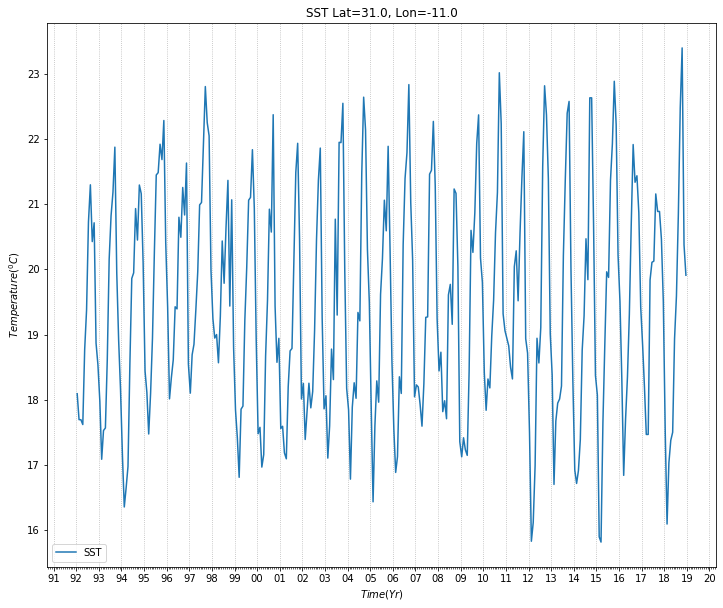


 *** DONE ***


In [22]:
#### Plot Time Series ####

Fig = matplotlib.pyplot.figure('Time Series', figsize=(12, 10))
Ax = matplotlib.pyplot.subplot()

# Plot time series
X = Var.time.values
Y = Var.values
matplotlib.pyplot.plot(X, Y, label='SST')
  
#Format X and Y axis
Yr = matplotlib.dates.YearLocator()   # every year
Mth = matplotlib.dates.MonthLocator()  # every month
YrFmt = matplotlib.dates.DateFormatter('%y')
Ax.xaxis.set_major_locator(Yr)
Ax.xaxis.set_major_formatter(YrFmt)
Ax.xaxis.set_minor_locator(Mth)

matplotlib.pyplot.xlabel('$Time (Yr)$')
matplotlib.pyplot.ylabel('$Temperature (^0C)$')

#Grid
Ax.xaxis.grid(color='0.7', linestyle=':')

# Legend
Ax.legend(loc='lower left')

# Title
Title = 'SST Lat={}, Lon={}'.format(Var.latitude.values, Var.longitude.values)
matplotlib.pyplot.title(Title)

# Show figure
matplotlib.pyplot.show()

# Save figure
FigOut = '{}/IBI-PHY_time_series.jpg'.format(PathOut)
Fig.savefig(FigOut)

print('\n *** DONE ***')

<blockquote>

### Disscusion of results

* Observe and discuss the annual cycle of SST in the selected location.
* What are the real values of latitude and longitude of the time series ploted?
* Are they the same than the lat/lon values requested in the configuration options?


### Exercise:

* Modify the previous code to show time series in other locations.
* Modify the previous code to show time series of IBI-PHY-NRT data using the same dataset downloaded in [section 3](#3.-Visualization-of-upwelling-in-daily-basis-with-IBI-PHY-NRT-products).

</blockquote>

Alternatively, a temperature-based upwelling index is routinely computed and distributed by IBI-MFC as [CMEMS Ocean Monitoring Indicator](https://marine.copernicus.eu/science-learning/ocean-monitoring-indicators/) (OMI). OMIs deliver an integrated view of state-of-the-art and high quality information on physical and biogeochemical changes of the marine environment for a continuous monitoring of the global ocean and the European regional seas.

The [IBI Coastal Upwelling Index](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=IBI_OMI_CURRENTS_cui) (CUI) OMI is a user-oriented product that routinely computes the upwelling index for the IBI western continental margin from 26ºN to 48ºN. Additionally, this product provides the trend analysis of the upwelling index computed from the IBI-PHY-REA product.

![IBI CUI](img/IBI_OMI_CURRENTS_cui-hq.png)

# 5. Vertical section of temperature
[Go back to the "Table of contents"](#Table-of-contents)

In the following exercise we will analyze the vertical structure of the upwelling. A zonal section of temperature is shown to analyze the skill of IBI physical model products reproducing the temperature field in the upper ocean layers from the surface down to 500m depth.

For this exercise we open again the dataset of the IBI-PHY-REA system downloaded in [section 2](#2.-Visualization-of-upwelling-in-monthly-basis-with-IBI-PHY-REA-products).

## 5.1. Input
The following parameters are defined:

* **FName:** Name and path where the datafile is stored
* **VarName:** Name of the variable to be used in the datafile.
* **SecLon:** Define two longitudes for the zonal section limits.
* **SecLat:** Define a constant latitude lat for the zonal section.
* **Initial and Final Dates (DateIni, DateEnd):** Define a range of dates to be plotted.
* **PathOut:** Path where the resulting figures will be stored.



In [23]:
#### Config Options ####

FName = 'data/IBI-PHY-REA_temperature_reanaysis_005_002_monthly.nc'
VarName = 'thetao'

# Define geographical parameters
SecLon = [-15, -9.5]  #[LonMin, LonMax]
SecLat = 31

# Define initial and final dates (yyyy,mm,dd)
DateIni = datetime.datetime(2015,7,1)  
DateEnd = datetime.datetime(2016,12,1)

# Path to store the resulting figures
PathOut = 'results/IBI-PHY_vertical_sections'


The following lines open the data file, show a summary of the data stored in the file, and show a map with the selected location for the zonal section. Doted red line indicates the location of the zonal section.

<xarray.Dataset>
Dimensions:    (depth: 32, latitude: 145, longitude: 181, time: 324)
Coordinates:
  * depth      (depth) float32 0.50576 1.5558553 2.6676817 ... 457.6256 565.2923
  * latitude   (latitude) float32 26.0 26.083334 26.166666 ... 37.916668 38.0
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2018-12-16T12:00:00
  * longitude  (longitude) float32 -19.0 -18.916666 ... -4.083334 -4.0000005
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.0
    source:                                 CMEMS IBI-MFC
    institution:                            Puertos del Estado (PdE) - Mercat...
    references:                             http://marine.copernicus.eu
    nco_openmp_thread_number:               1
    title:                                  CMEMS IBI REANALYSIS: MONTHLY PHY...
    easting:            

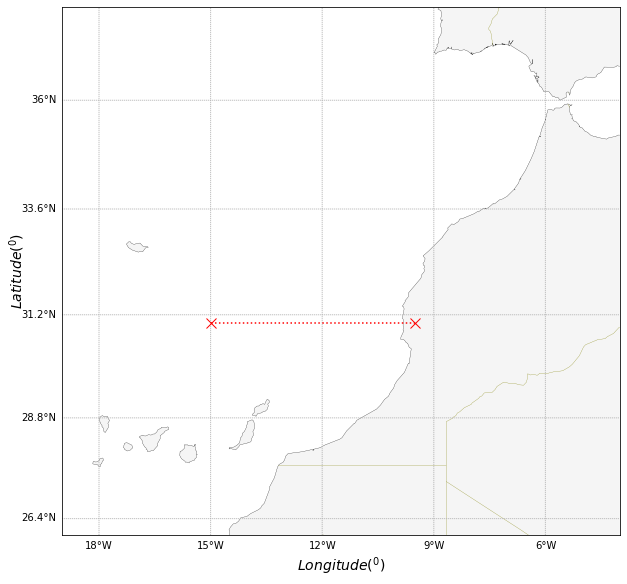

In [24]:
#### Open netCDF file ####

# Open data sample
DS = xarray.open_dataset(FName)

# Show info of the data file
print(DS)

#### Quick look of the selected section ####

# Get from the dataset the lat/lon boundaries for the map
LatMin = numpy.nanmin(DS.latitude)
LatMax = numpy.nanmax(DS.latitude)
LonMin = numpy.nanmin(DS.longitude)
LonMax = numpy.nanmax(DS.longitude)

# Map plot
Fig = matplotlib.pyplot.figure(figsize=(10, 10))
Ax = matplotlib.pyplot.subplot()

Map = Basemap(projection='merc',
              llcrnrlon=LonMin, llcrnrlat=LatMin,
              urcrnrlon=LonMax, urcrnrlat=LatMax,
              resolution='i', area_thresh=200.0)


# draw coastlines, country boundaries, fill continents.
Map.drawcoastlines(linewidth=0.25)
Map.drawcountries(linewidth=0.25, color='olive')
Map.fillcontinents(color='whitesmoke')

# Draw parallels & meridians
DLat = (LatMax - LatMin) / 5
DLat = float('{:4.1f}'.format(DLat))
DLon = (LonMax - LonMin) / 5
DLon = float('{:4.1f}'.format(DLon))
parallels = numpy.arange(0.,90,DLat)
Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
meridians = numpy.arange(-30.,60.,DLon)
Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')

# Axes labels
matplotlib.pyplot.ylabel('$Latitude (^0)$', labelpad=35, fontsize=14)
matplotlib.pyplot.xlabel('$Longitude (^0)$', labelpad=20, fontsize=14)

# Projection from Lat/Lon to axis X/Y
LonList = SecLon
LatList = [SecLat, SecLat]
X, Y = Map(LonList, LatList)

# Plot location
matplotlib.pyplot.plot(X, Y, 'r:x', markersize=10)

# Show figure
matplotlib.pyplot.show()


As in previous examples, the following code defines the variable `Var` that stores the data of the specific variable (`VarName`) in the closest grid points to the selected latitude (`SecLat`) and longitudes (`SecLon`).

Additionally, a short summary of the selected data is printed.

In [25]:
#### Select data to plot ####

# Shorcut to selected data
Var = DS[VarName].sel(latitude = SecLat, method = 'nearest')
Var = Var.sel(longitude = slice(SecLon[0], SecLon[1]),
              time      = slice(DateIni, DateEnd))

# Show info of the selected data
print(Var)

<xarray.DataArray 'thetao' (time: 17, depth: 32, longitude: 67)>
array([[[21.975   , 21.976002, ...,       nan,       nan],
        [21.975   , 21.976002, ...,       nan,       nan],
        ...,
        [12.12    , 12.131001, ...,       nan,       nan],
        [11.148   , 11.219   , ...,       nan,       nan]],

       [[23.485   , 23.502   , ...,       nan,       nan],
        [23.483002, 23.501   , ...,       nan,       nan],
        ...,
        [12.39    , 12.360001, ...,       nan,       nan],
        [11.523   , 11.472   , ...,       nan,       nan]],

       ...,

       [[22.943   , 22.965   , ...,       nan,       nan],
        [22.937   , 22.960001, ...,       nan,       nan],
        ...,
        [12.144   , 12.147   , ...,       nan,       nan],
        [11.458   , 11.484   , ...,       nan,       nan]],

       [[21.831001, 21.868   , ...,       nan,       nan],
        [21.829   , 21.865002, ...,       nan,       nan],
        ...,
        [12.188   , 12.209   , ...,   

## 5.2. Vertical sections

2015-07-16


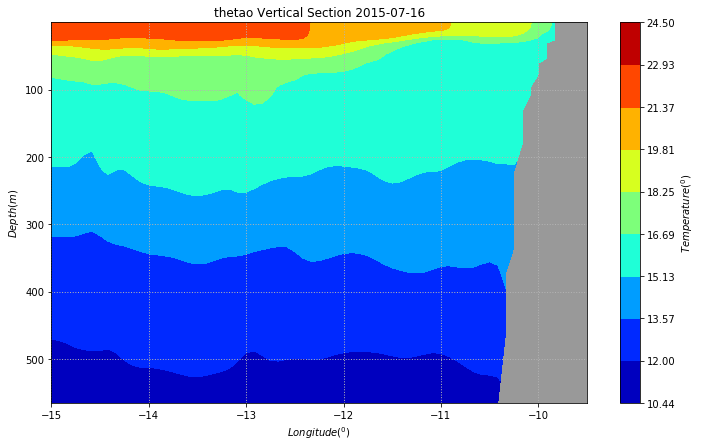

2015-08-16


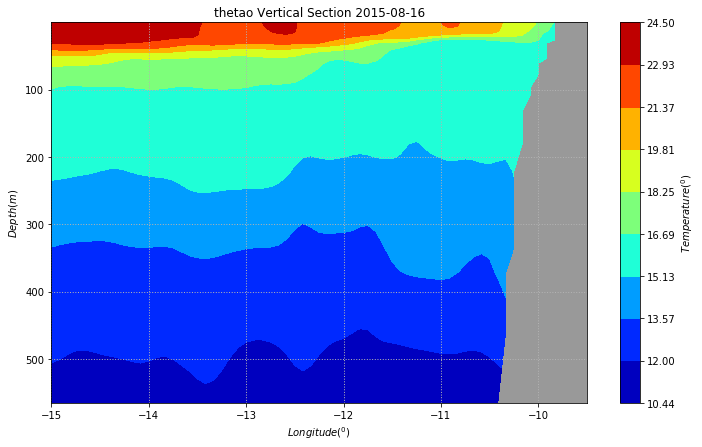

2015-09-16


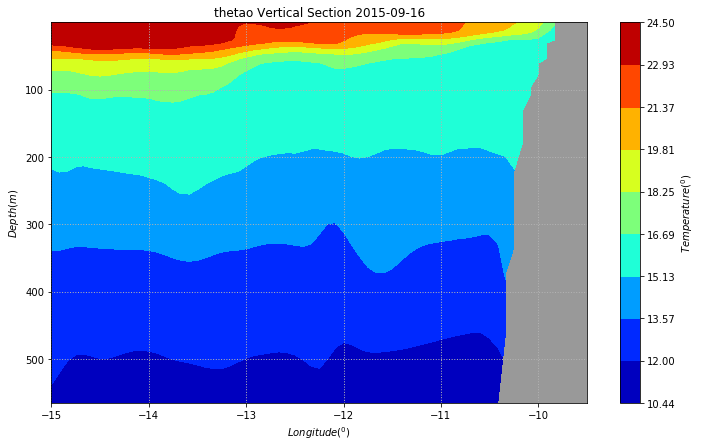

2015-10-16


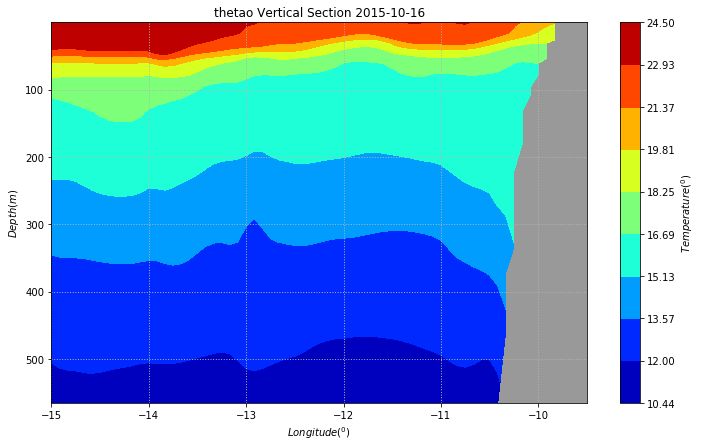

2015-11-16


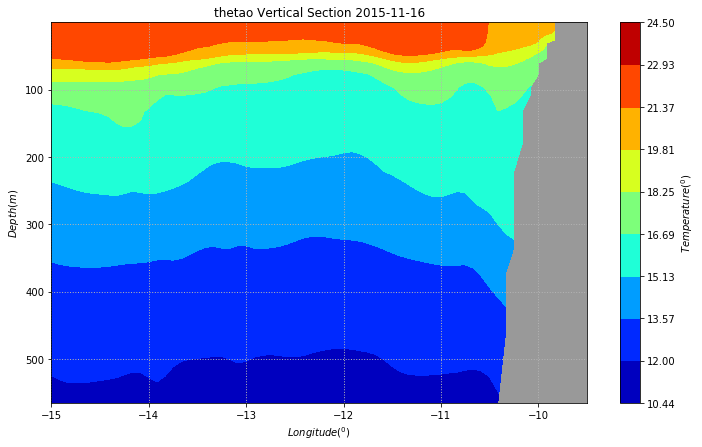

2015-12-16


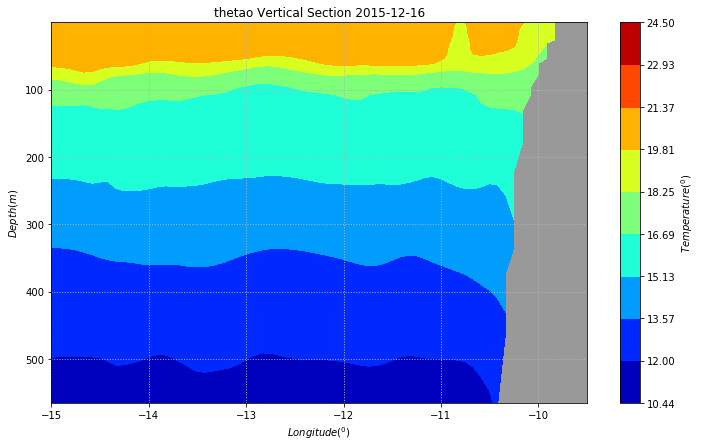

2016-01-16


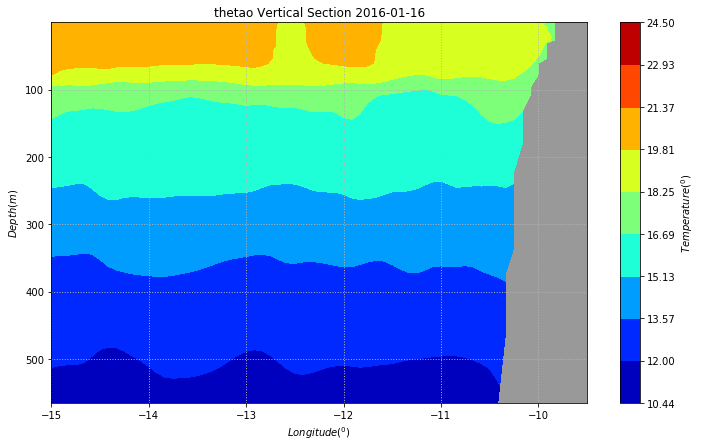

2016-02-15


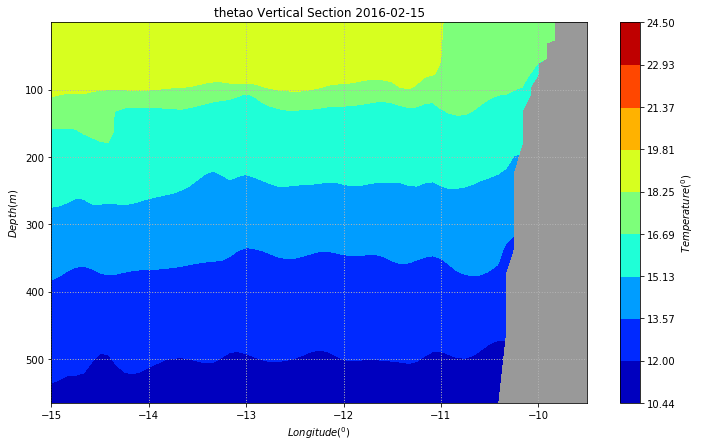

2016-03-16


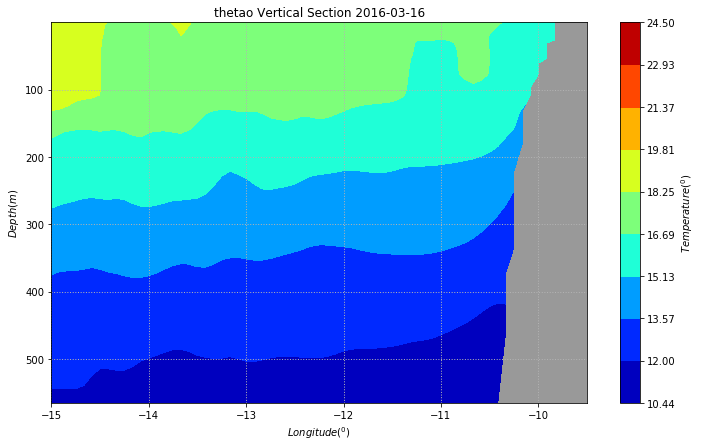

2016-04-16


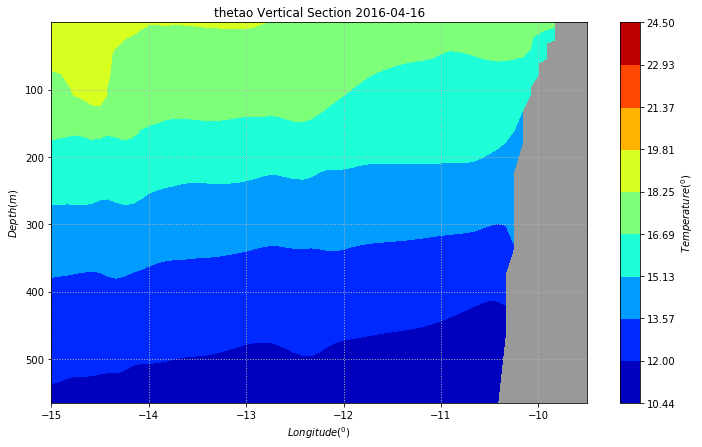

2016-05-16


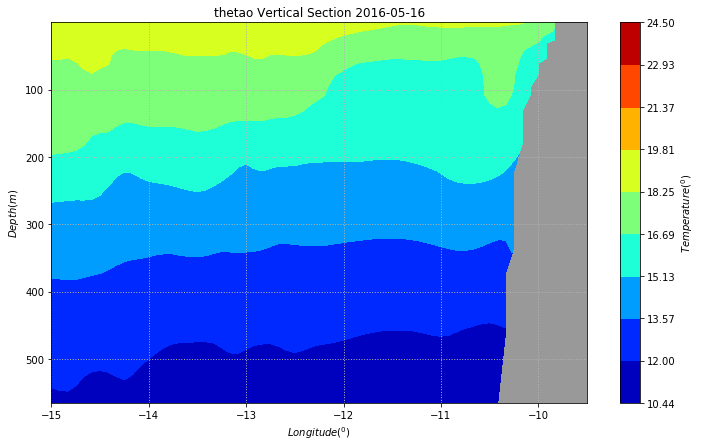

2016-06-16


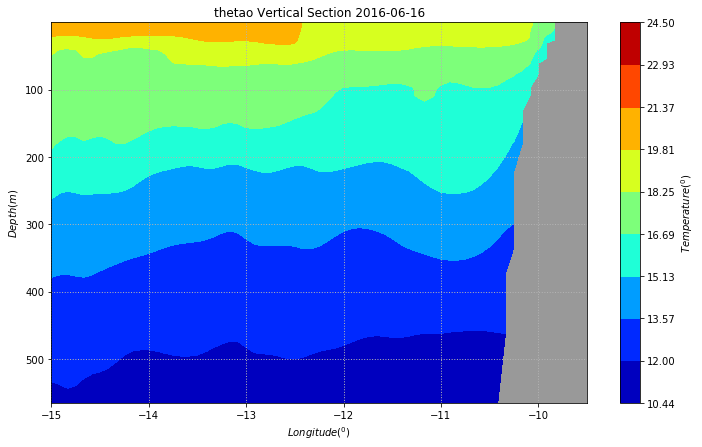

2016-07-16


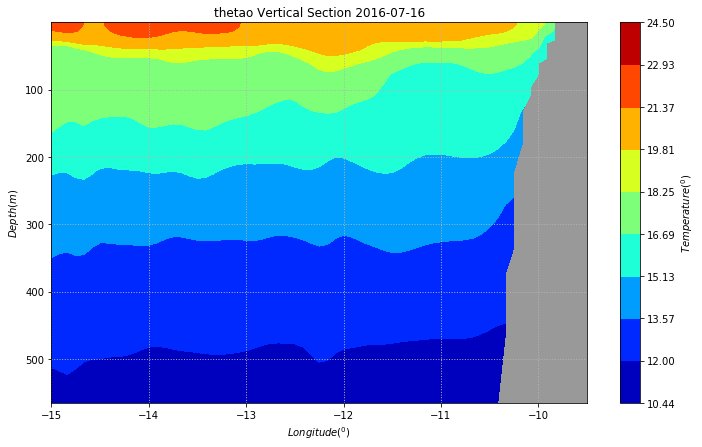

2016-08-16


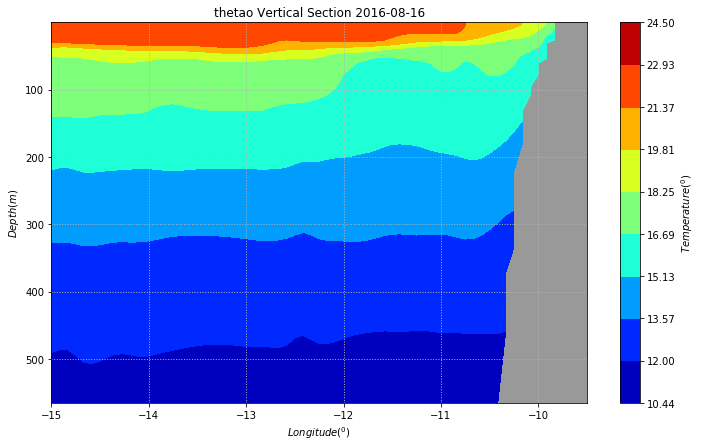

2016-09-16


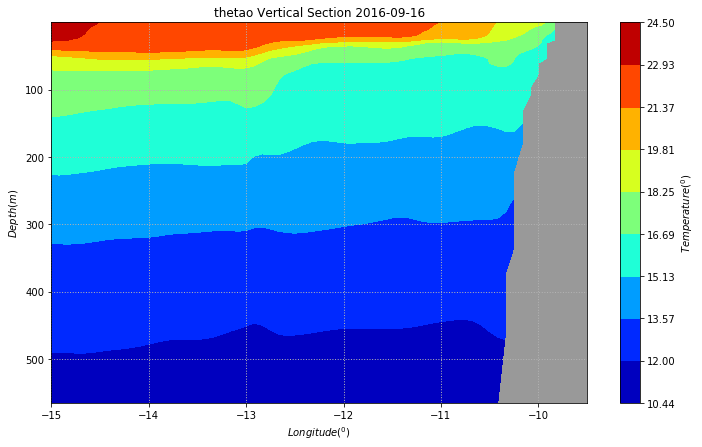

2016-10-16


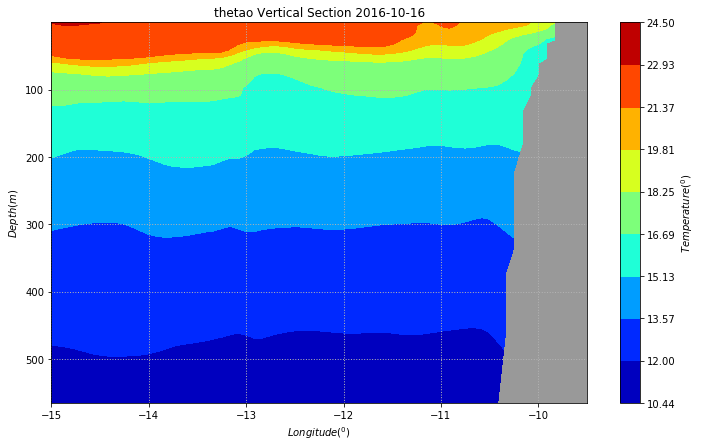

2016-11-16


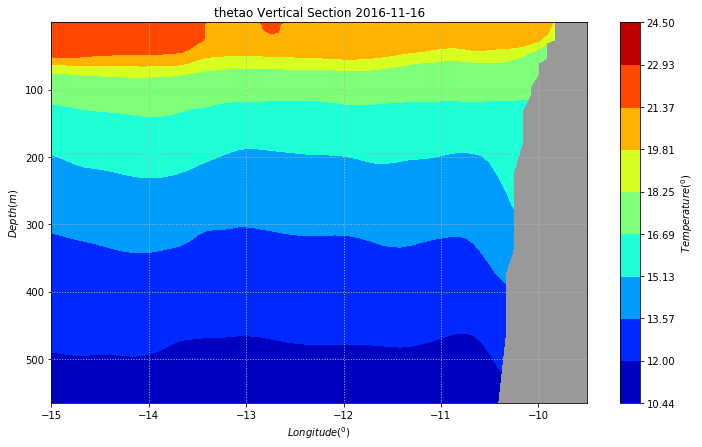


*** DONE ***


In [26]:
#### Plot Sections ####

MinVal = numpy.nanmin(Var)
MaxVal = numpy.nanmax(Var)
Levels = numpy.linspace(MinVal, MaxVal, 10)

# Loop over every time step
for TimeStep in Var.time.values:
    StrDate = to_datetime(str(TimeStep)).strftime('%Y-%m-%d')
    print(StrDate)
    
    # Selecting data to plot
    D2P = Var.sel(time = TimeStep)

    # Open figure
    Fig = matplotlib.pyplot.figure(figsize=(12, 7))
    Ax = matplotlib.pyplot.subplot()

    # Set the backgroungd to gray
    matplotlib.pyplot.gca().patch.set_color('0.6')

    # Plot data
    X = D2P.longitude.values
    Y = D2P.depth.values
    Z = D2P.values
    Sec = matplotlib.pyplot.contourf(X, Y, Z, levels = Levels, cmap = 'jet')

    # Invert Y axis
    Ax.invert_yaxis()

    # Grid
    Ax.grid(color='0.7', linewidth=1, linestyle=':')

    #Color Scale
    Cb = Fig.colorbar(Sec) #, pad=0.02)
    Cb.set_label('$Temperature (^0)$')

    # Axis labels and title
    matplotlib.pyplot.xlabel('$Longitude (^0)$')
    matplotlib.pyplot.ylabel('$Depth (m)$')

    Title = '{} Vertical Section {}'.format(VarName, StrDate)
    matplotlib.pyplot.title(Title)

    # Show
    matplotlib.pyplot.show()
    
    # Save figure
    FigOut = '{}/IBI-PHY_section_{}.jpg'.format(PathOut, StrDate)
    Fig.savefig(FigOut)

print('\n*** DONE ***')

<blockquote>

### Discussion of results
* Observe and discuss the vertical structure of temperature and compare the results in-shore and off-shore.
* Discuss the annual cycle of temperature.

### Exercise:
* Modify the previous code to show meridional sections.

</blockquote>